In [1]:
import sys
sys.path.insert(0, "../src")
from IPython.core import display as ICD

In [2]:
import chess
import chess.engine
import constants
import placements
import random
import automate
import mcts

### Define MCTS Agent and Stockfish Engine

In [3]:
n = 10 # Number of playouts
engine = chess.engine.SimpleEngine.popen_uci(constants.SF_PATH)
mcts_player = lambda: mcts.mcts_strategy(n, engine)

## Game 1: MCTS (White) vs Random (Black)

### Placing initial pieces
White played by MCTS agent.
Black is playing random moves.

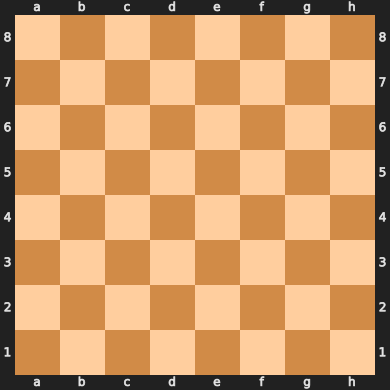

White: ('P', 'f3')


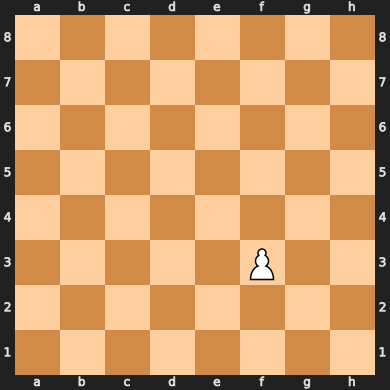

Black: ('p', 'g6')


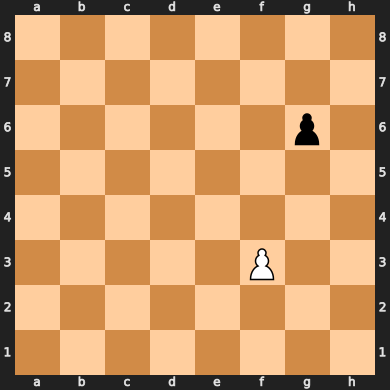

White: ('P', 'e2')


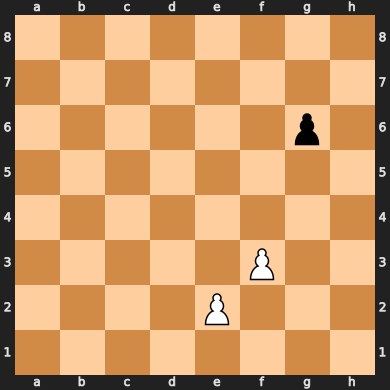

Black: ('p', 'g7')


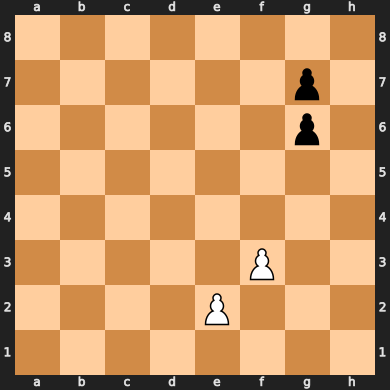

White: ('P', 'a2')


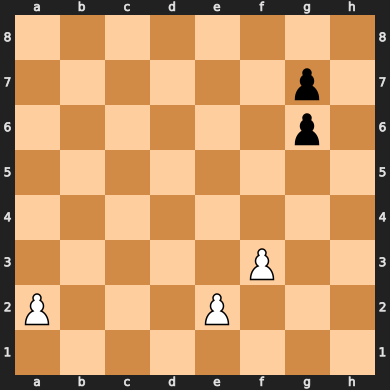

Black: ('p', 'a7')


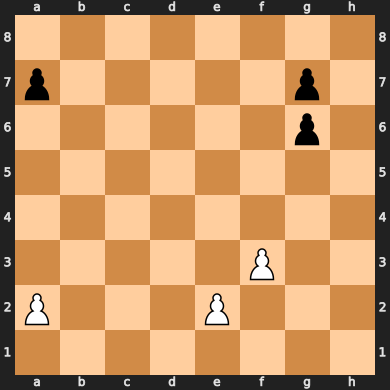

White: ('P', 'd3')


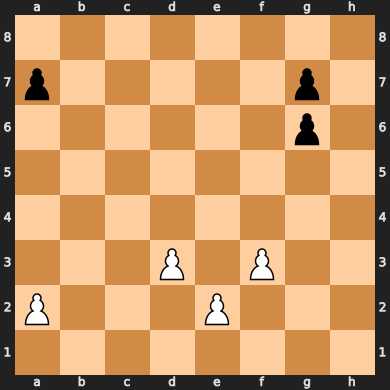

Black: ('p', 'a6')


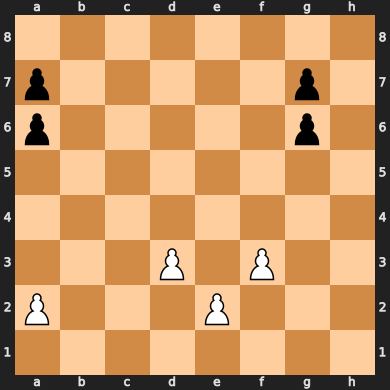

White: ('P', 'h3')


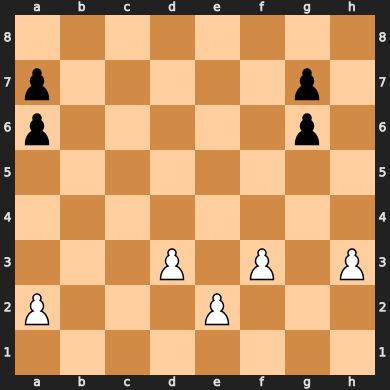

Black: ('p', 'h6')


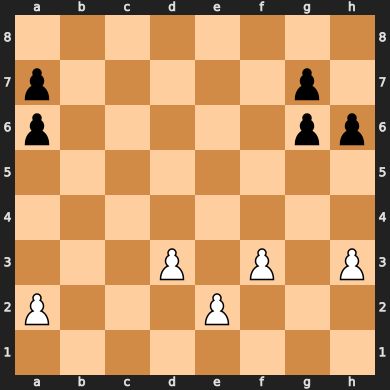

White: ('P', 'h2')


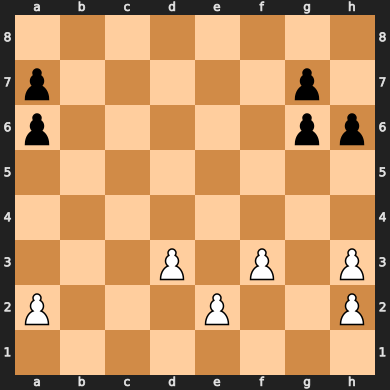

Black: ('p', 'h7')


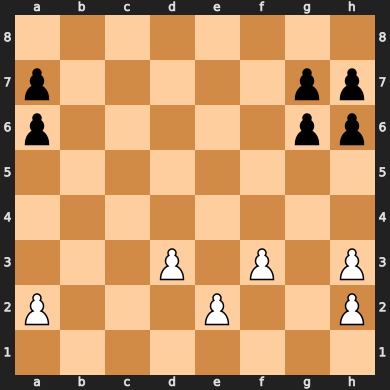

White: ('R', 'b2')


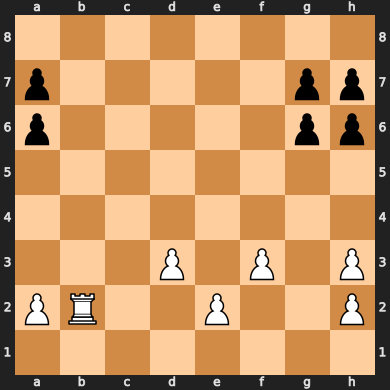

Black: ('r', 'd8')


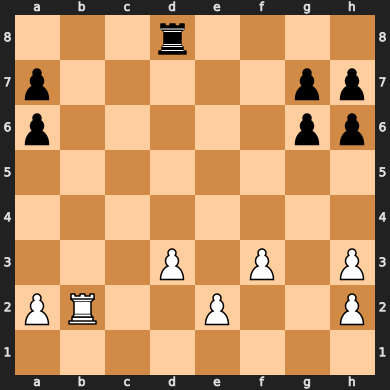

White: ('R', 'f2')


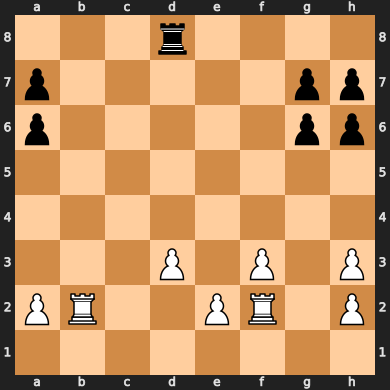

Black: ('q', 'h8')


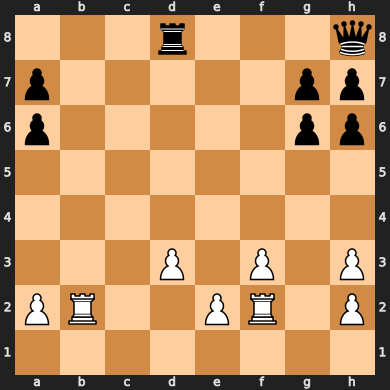

White: ('Q', 'a1')


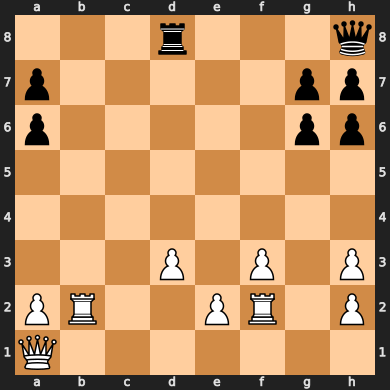

Black: ('q', 'f8')


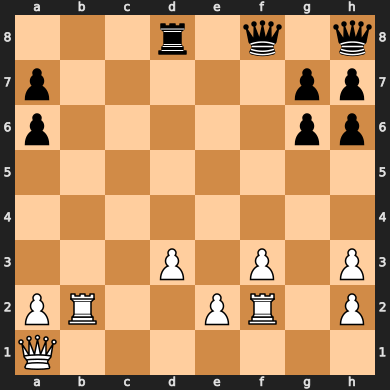

White: ('B', 'c1')


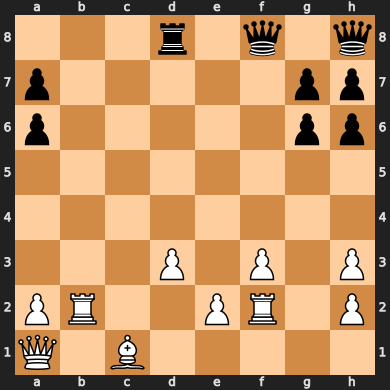

Black: ('p', 'e6')


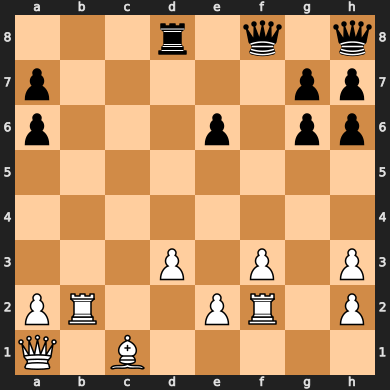

White: ('P', 'g3')


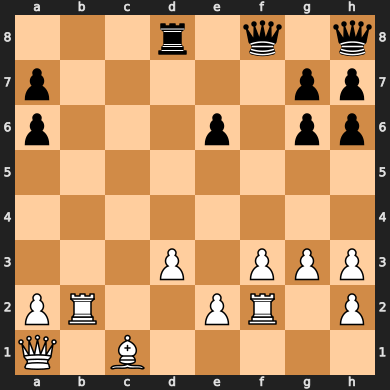

Black: ('n', 'e7')


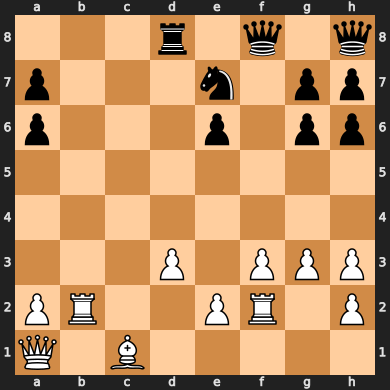

White: ('Q', 'h1')


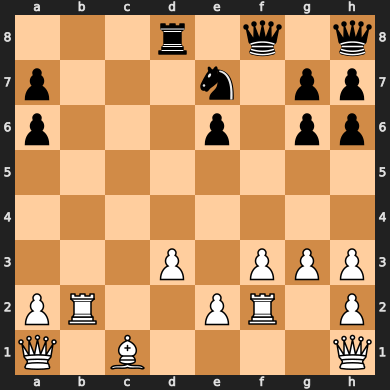

Black: ('q', 'd7')


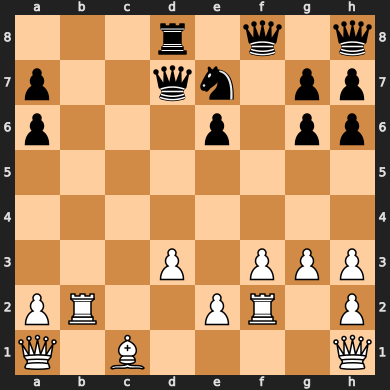

White: ('N', 'f1')


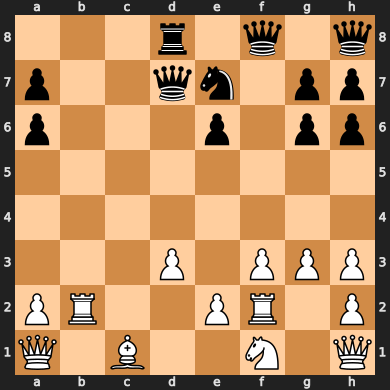

Black: ('k', 'c8')


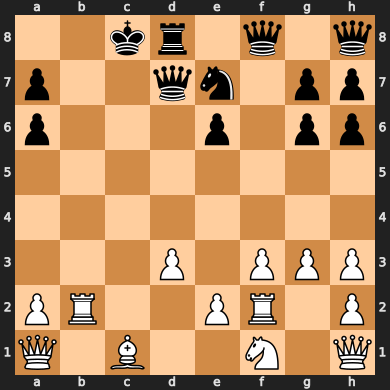

White: ('K', 'g2')


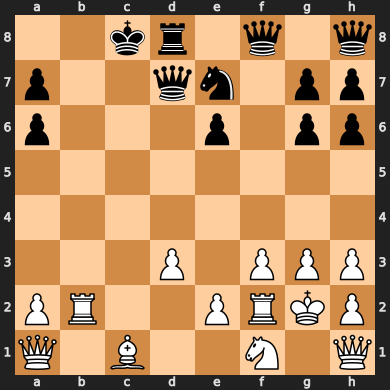

In [4]:
mcts_strat = mcts_player()
game = automate.AutomateGame()
pos = game.initial_position()
ICD.display(pos.get_chess_board())
while not pos.game_over():
    move_list = pos.legal_moves()
    if len(move_list) == 0:
        break
    if pos.turn:
        m = mcts_strat(pos)
        print("White:", m)
    else:
        m = random.choice(move_list)
        print("Black:", m)
    pos = pos.result(*m)
    ICD.display(pos.get_chess_board())

### Stockfish simulation
Once all the pieces are placed, stockfish simulates the game

white played 1.Bf4


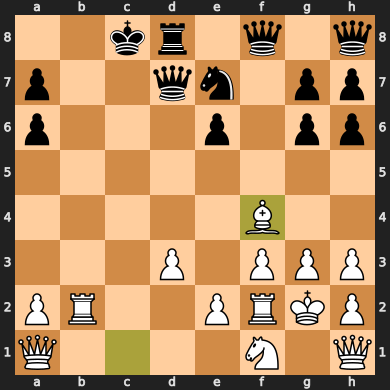

black played 1...Qc6


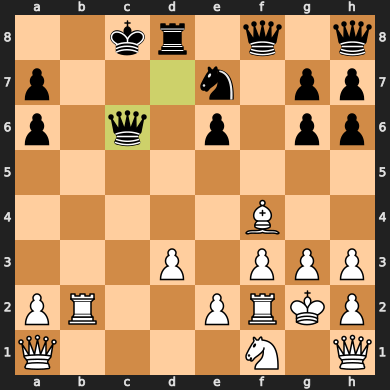

white played 2.e4


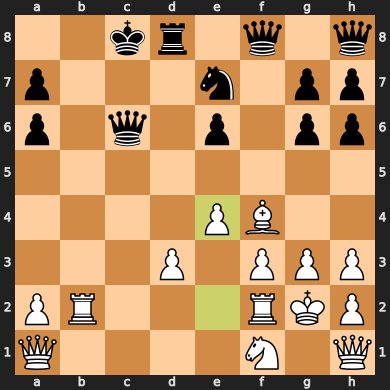

black played 2...Qa4


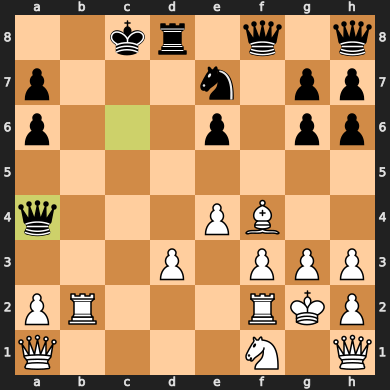

white played 3.Qg1


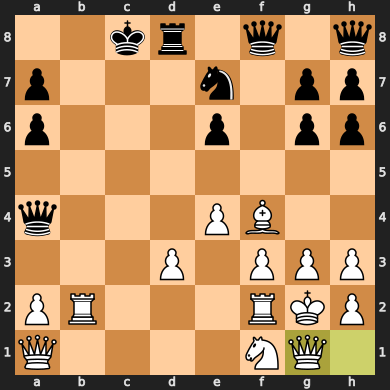

black played 3...Kd7


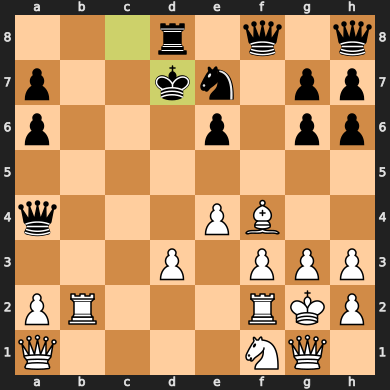

white played 4.Ne3


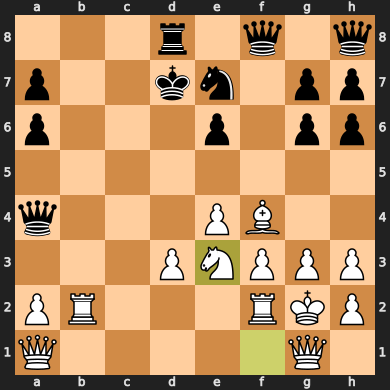

black played 4...Ke8


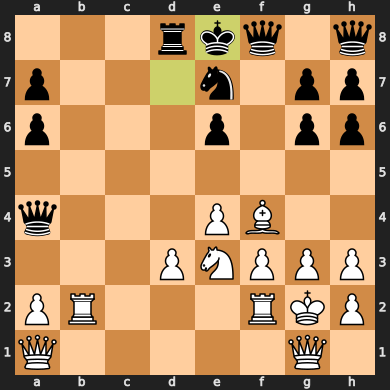

white played 5.Rb7


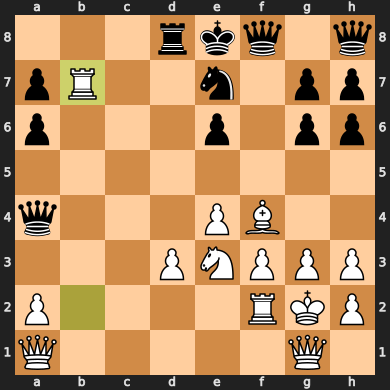

black played 5...g5


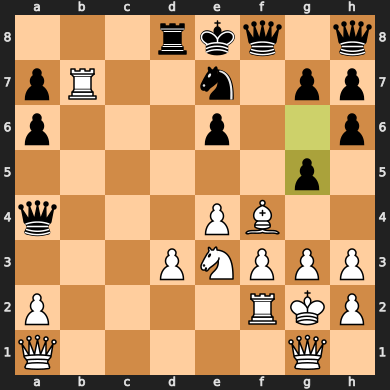

white played 6.Bc7


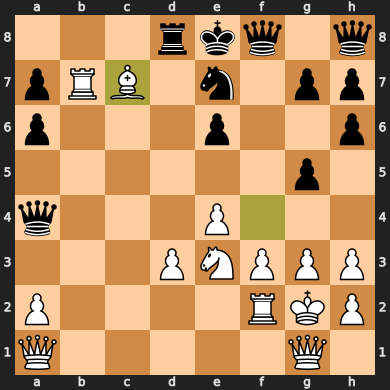

black played 6...Qc6


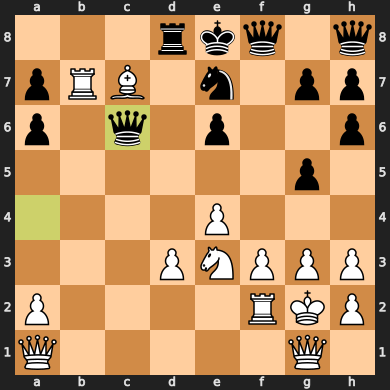

white played 7.Qb2


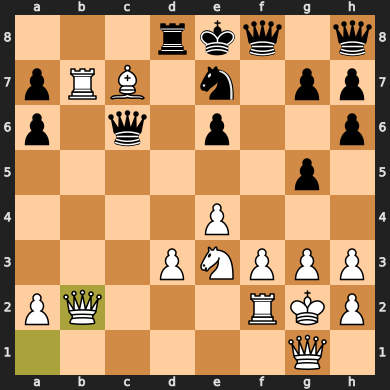

black played 7...Qd7


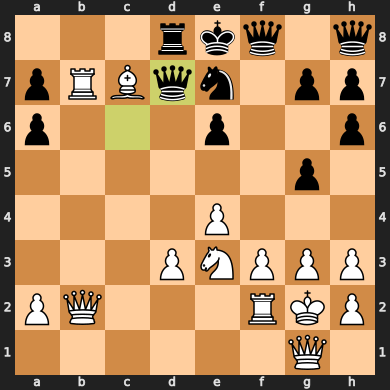

white played 8.Ng4


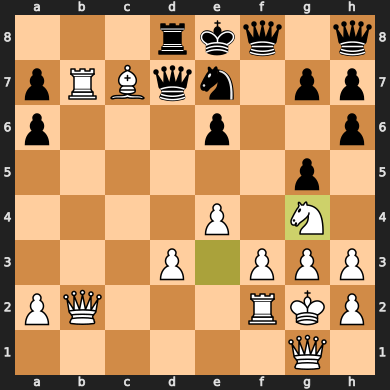

black played 8...Rc8


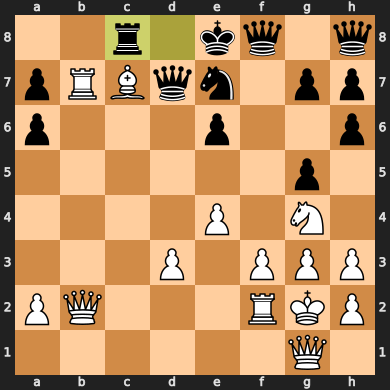

white played 9.Qgc1


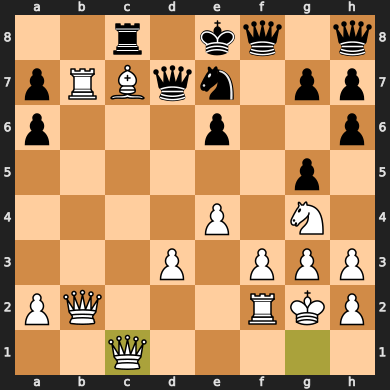

black played 9...g6


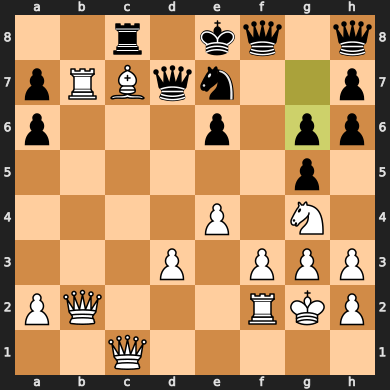

white played 10.Ne5


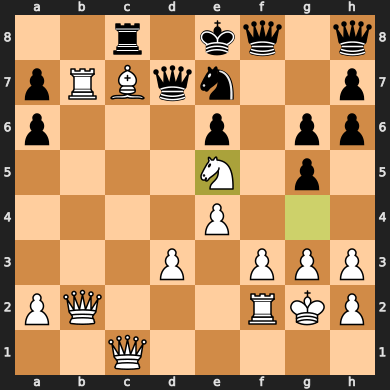

black played 10...Qa4


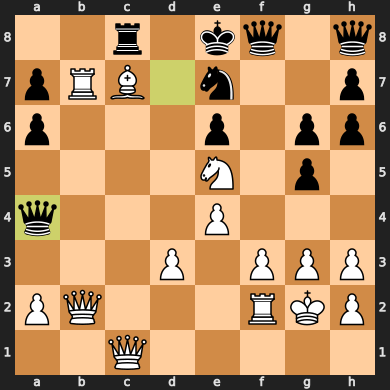

white played 11.Rb4


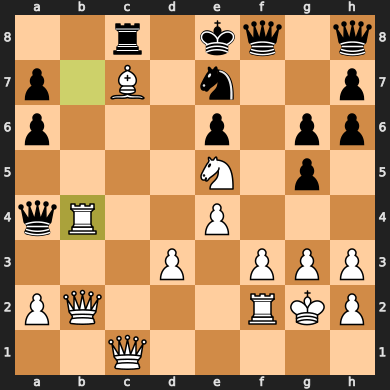

black played 11...Qxe5


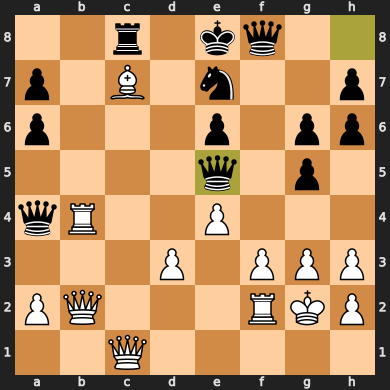

white played 12.Rxa4


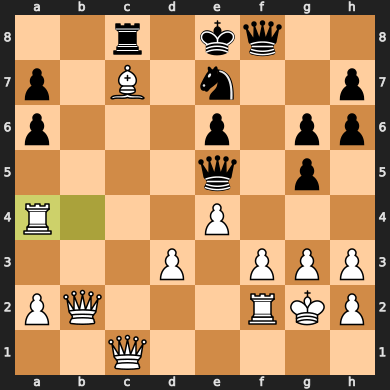

black played 12...Rxc7


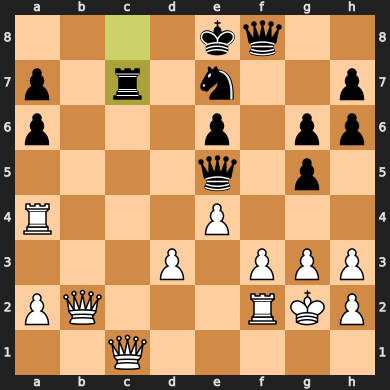

white played 13.Qxe5


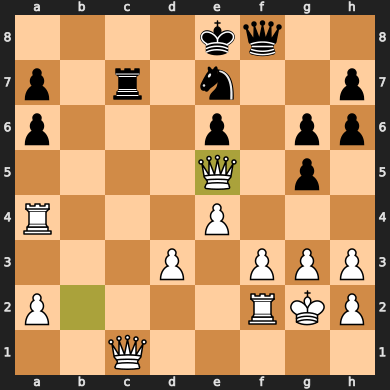

black played 13...Rxc1


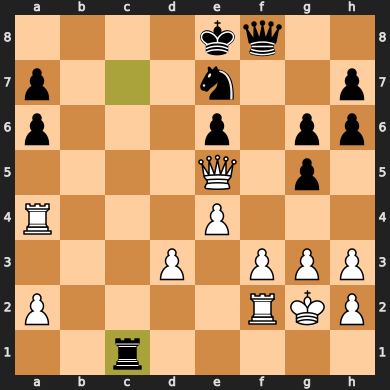

white played 14.Rxa6


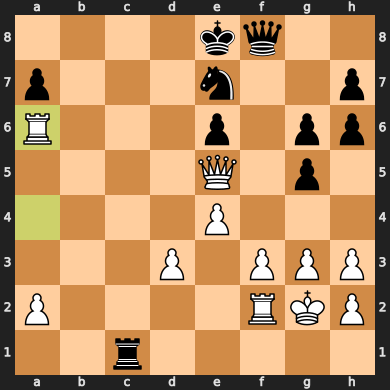

black played 14...h5


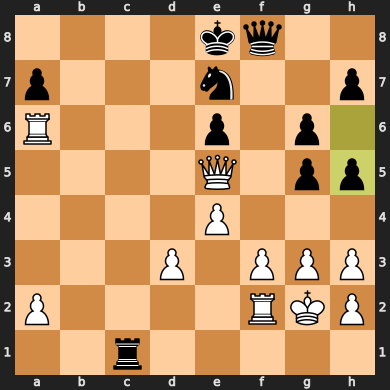

white played 15.Qb2


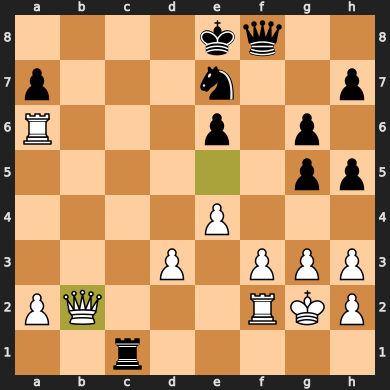

black played 15...Re1


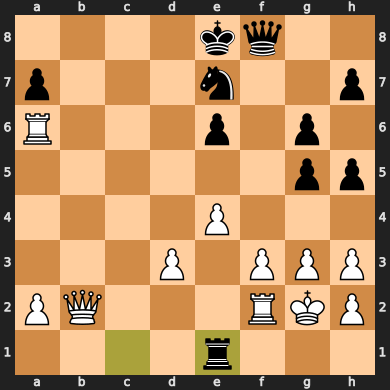

white played 16.f4


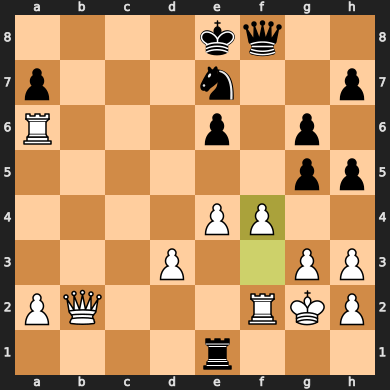

black played 16...g4


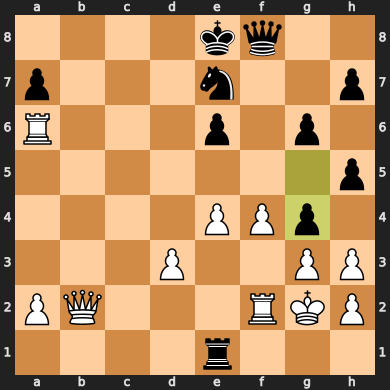

white played 17.hxg4


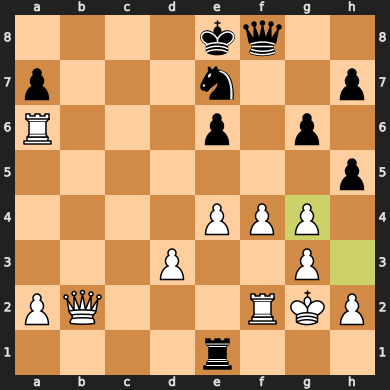

black played 17...hxg4


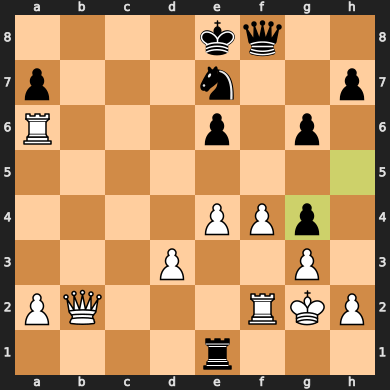

white played 18.Qb3


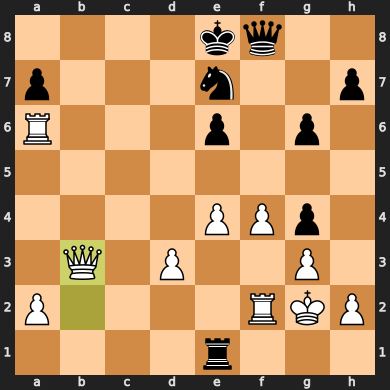

black played 18...Qh6


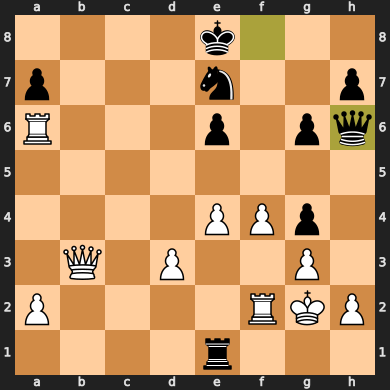

white played 19.Qb8+


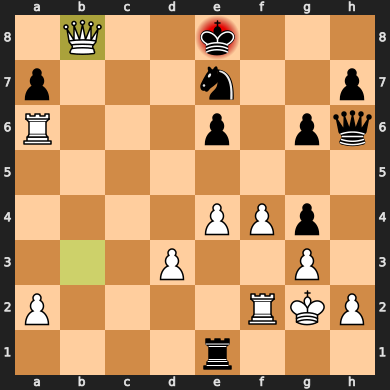

black played 19...Kf7


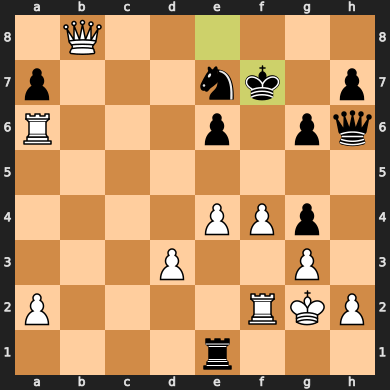

white played 20.h4


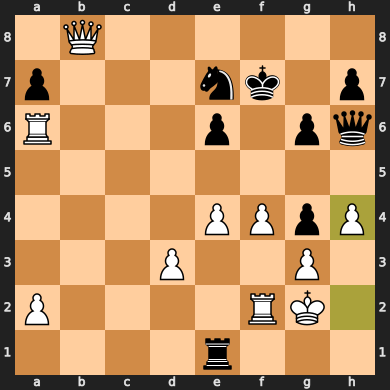

black played 20...gxh3+


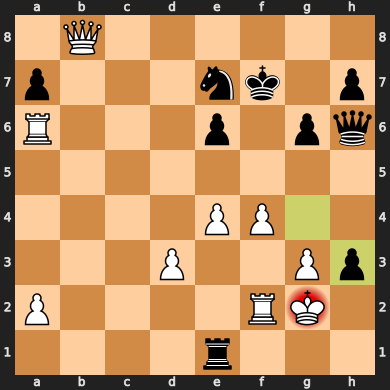

white played 21.Kh2


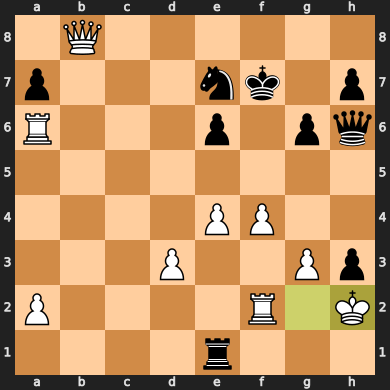

black played 21...Qh5


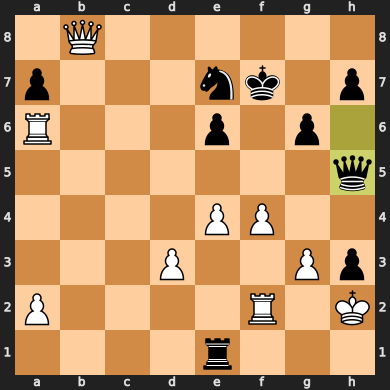

white played 22.Qb3


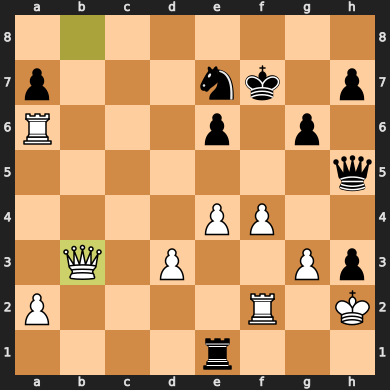

black played 22...Qc5


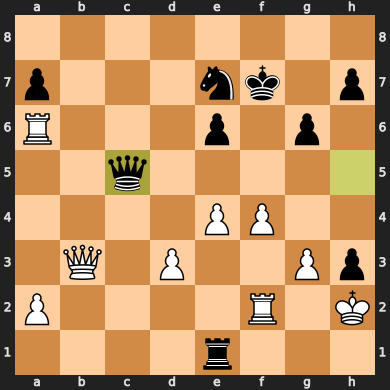

white played 23.Qc2


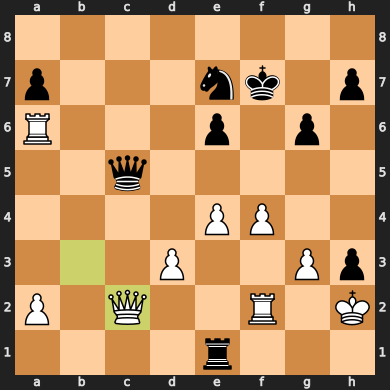

black played 23...Qe3


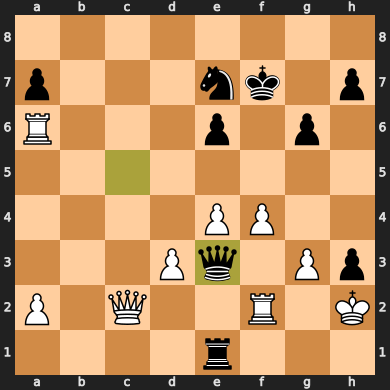

white played 24.Qd2


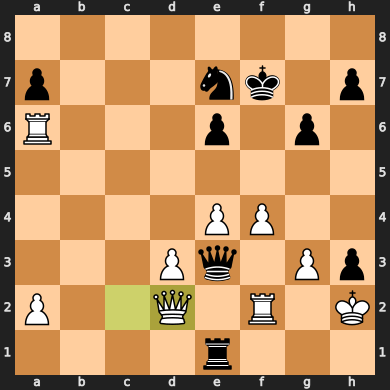

black played 24...Nf5


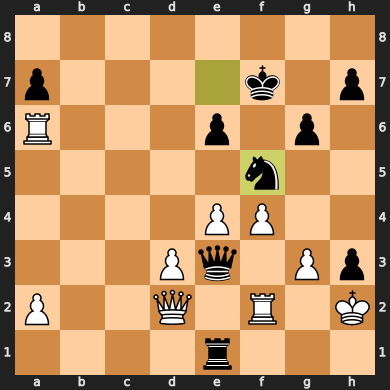

white played 25.exf5


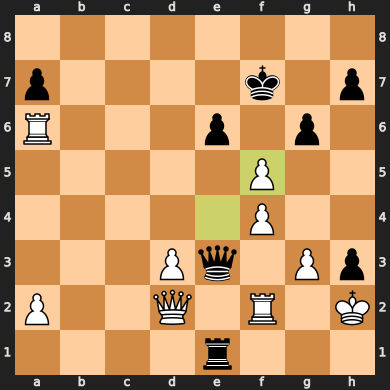

black played 25...gxf5


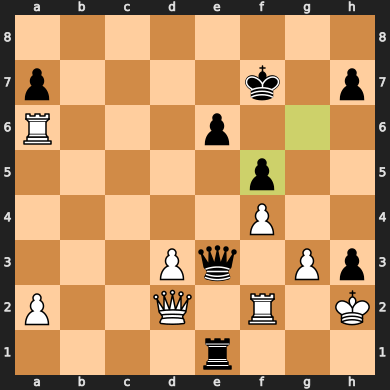

white played 26.Qxe3


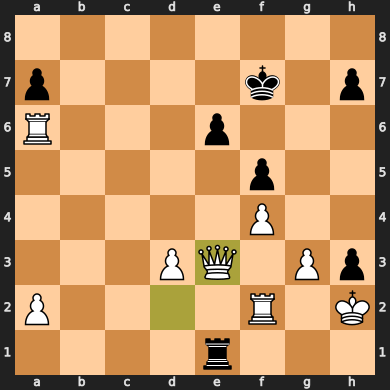

black played 26...Rxe3


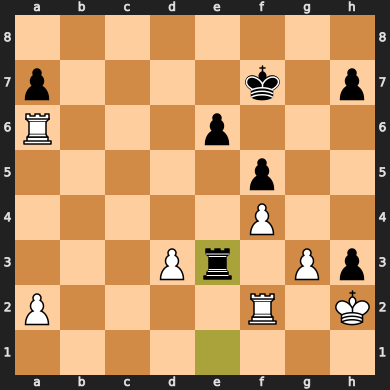

white played 27.Rxa7+


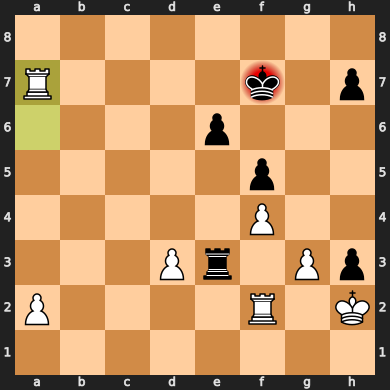

black played 27...Kf6


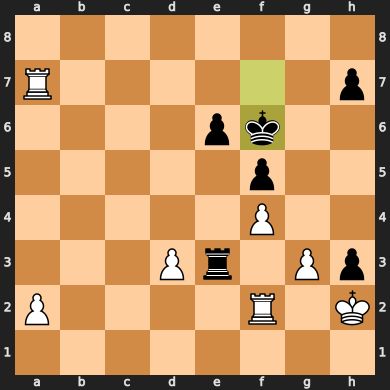

white played 28.d4


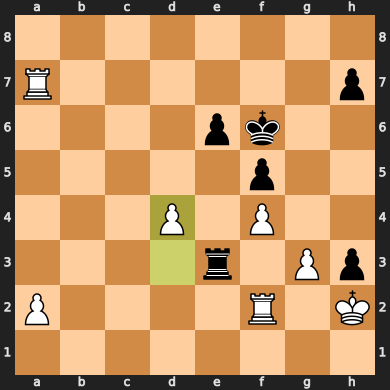

black played 28...h6


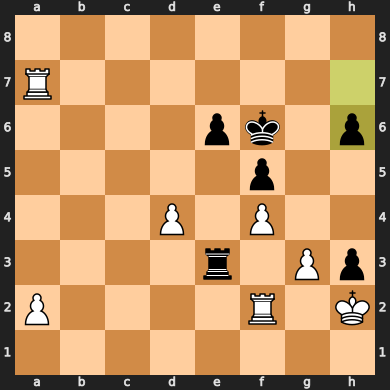

white played 29.Rd2


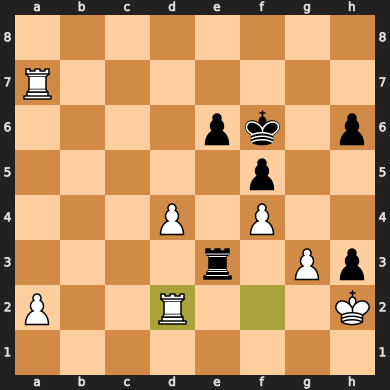

black played 29...h5


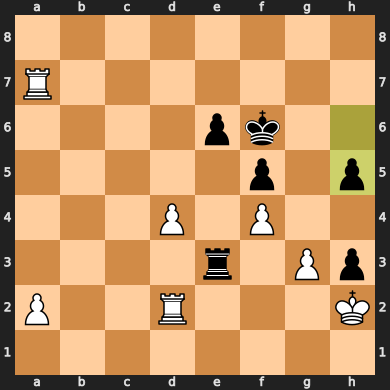

white played 30.a4


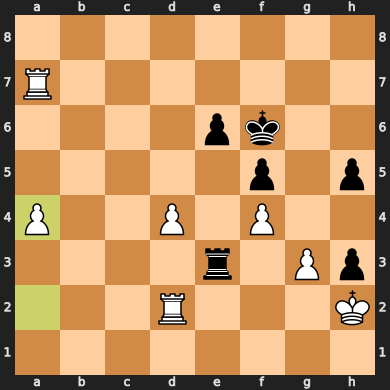

black played 30...Rb3


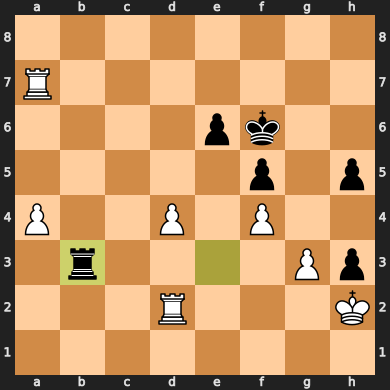

white played 31.a5


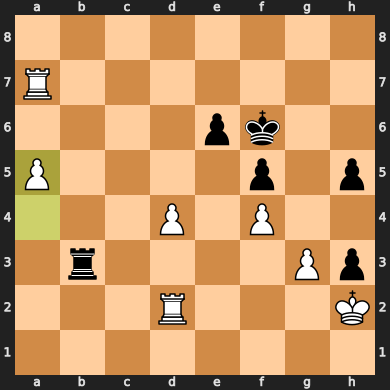

black played 31...h4


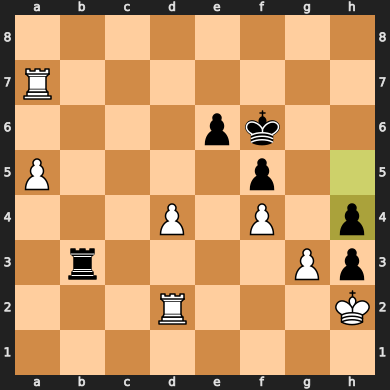

white played 32.gxh4


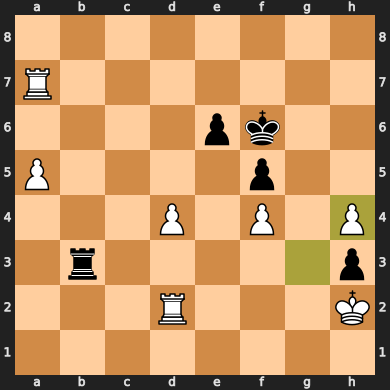

black played 32...Kg6


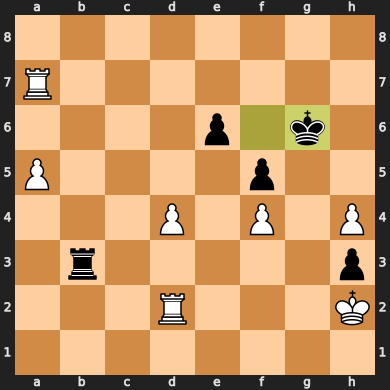

white played 33.Ra2


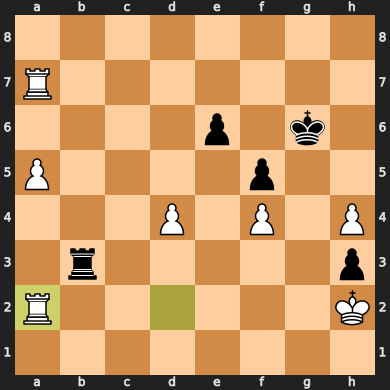

black played 33...Rf3


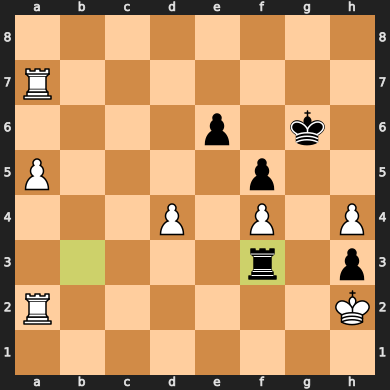

white played 34.Rd7


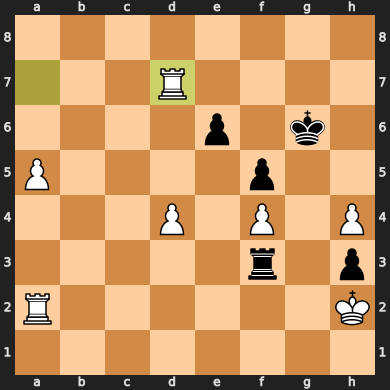

black played 34...Rxf4


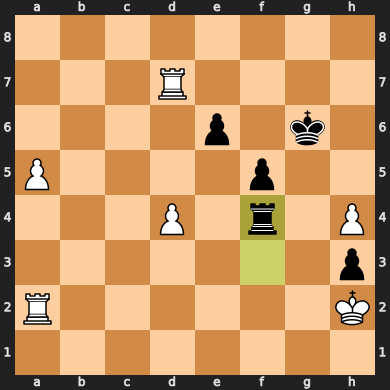

white played 35.Re2


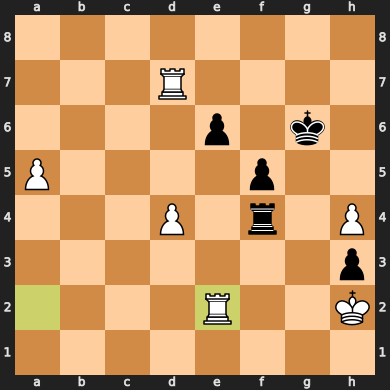

black played 35...Rxh4


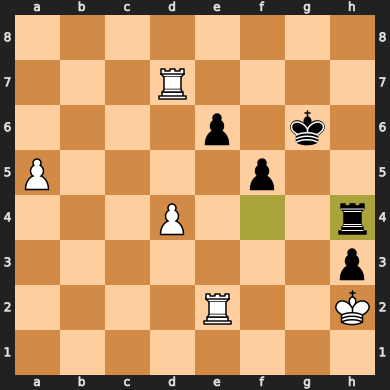

white played 36.Rxe6+


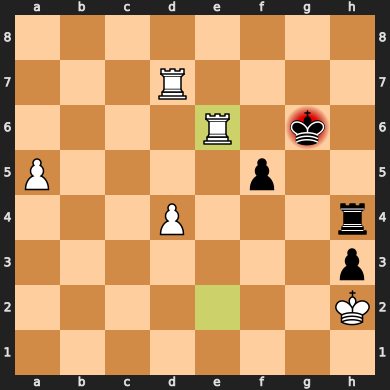

black played 36...Kg5


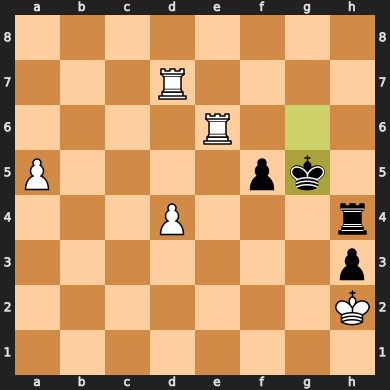

white played 37.Rg7+


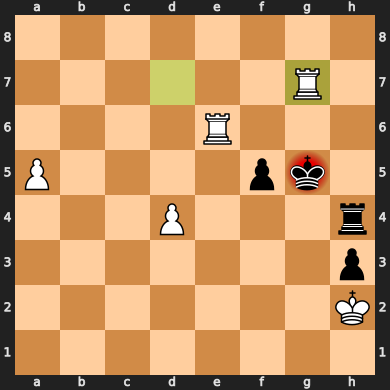

black played 37...Kf4


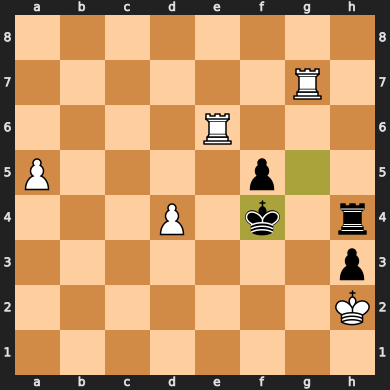

white played 38.d5


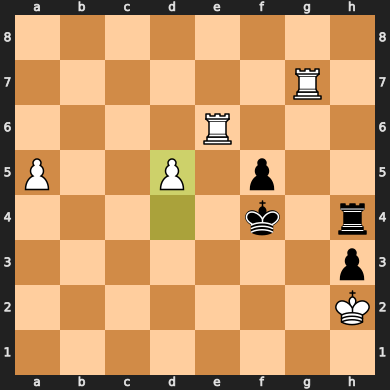

black played 38...Rh8


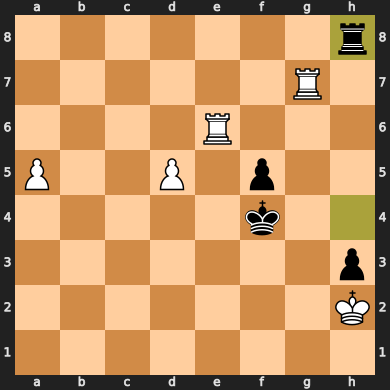

white played 39.a6


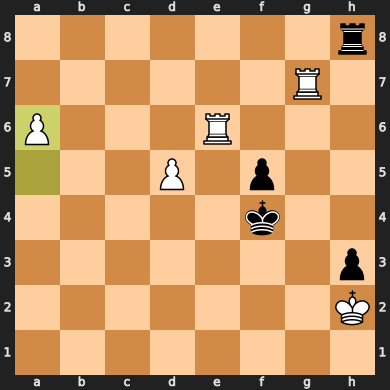

black played 39...Rd8


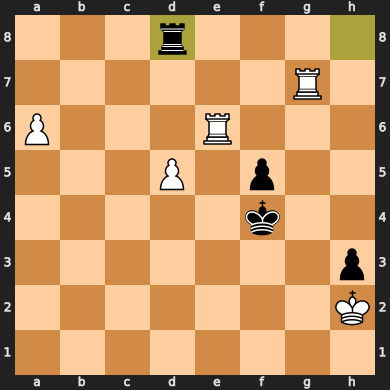

white played 40.d6


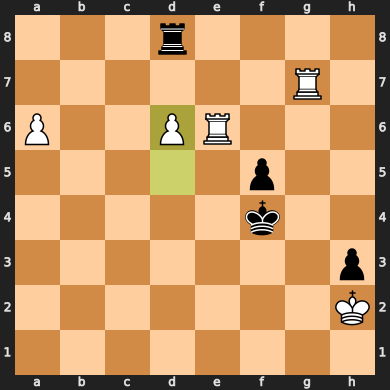

black played 40...Rxd6


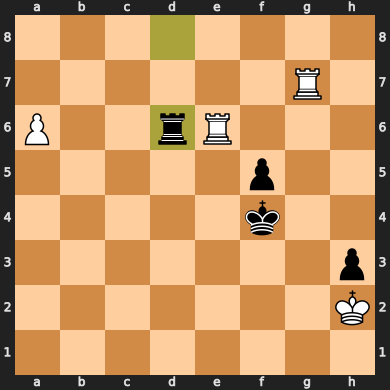

white played 41.Rxd6


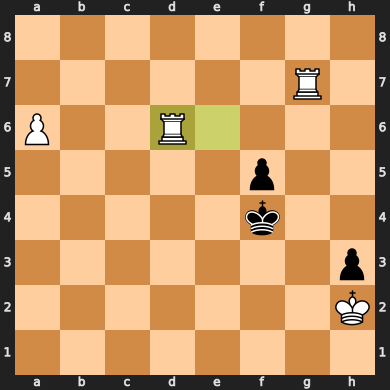

black played 41...Ke5


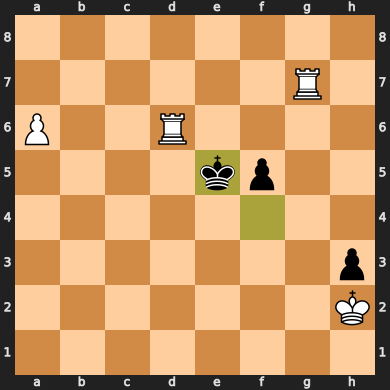

white played 42.Rh6


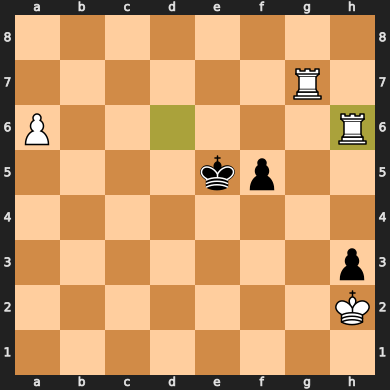

black played 42...f4


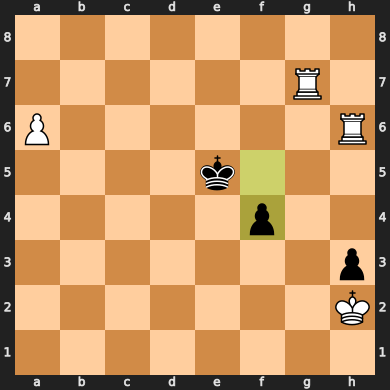

white played 43.a7


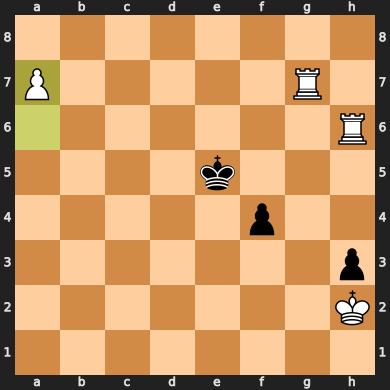

black played 43...f3


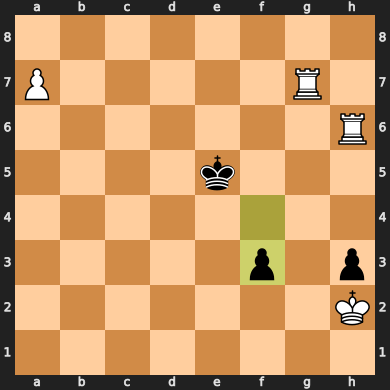

white played 44.a8=Q


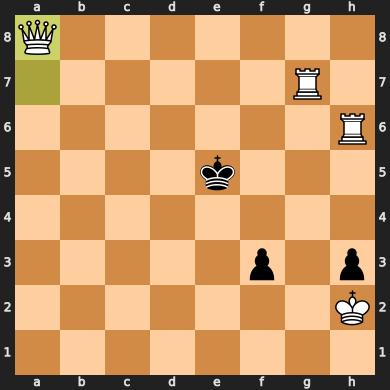

black played 44...f2


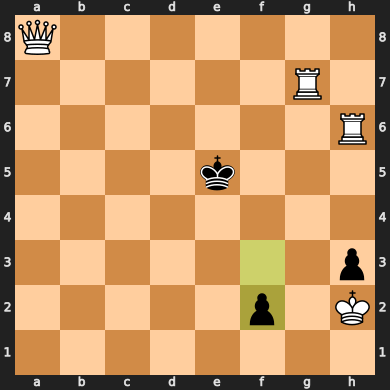

white played 45.Qa1+


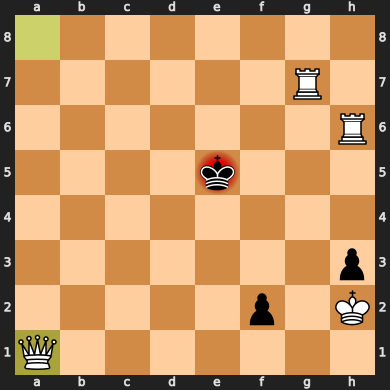

black played 45...Kd5


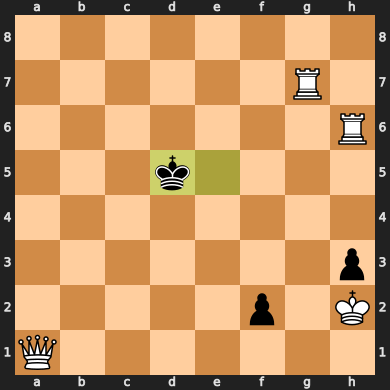

white played 46.Qa2+


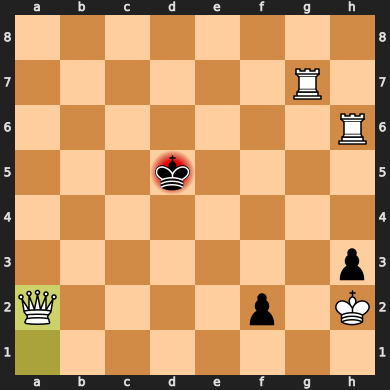

black played 46...Kd4


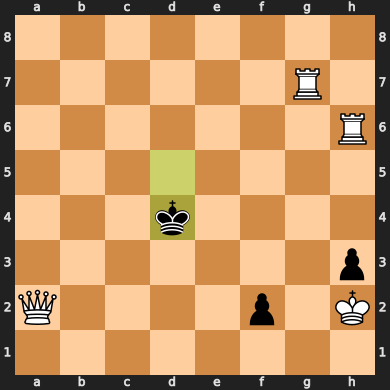

white played 47.Rg4+


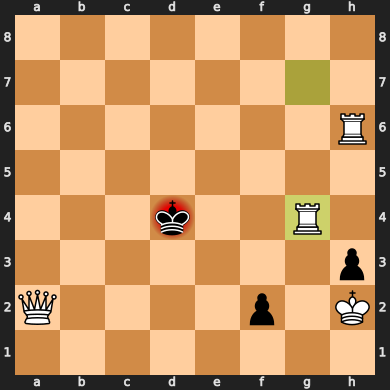

black played 47...Kc5


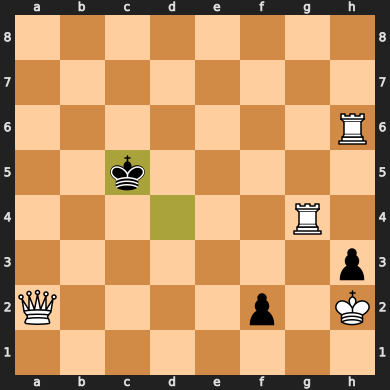

white played 48.Qc4#


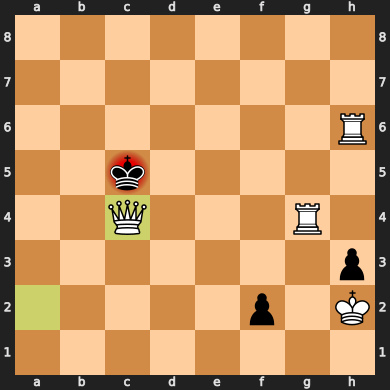

. . . . . . . .
. . . . . . . .
. . . . . . . R
. . k . . . . .
. . Q . . . R .
. . . . . . . p
. . . . . p . K
. . . . . . . .
Final position FEN:  8/8/7R/2k5/2Q3R1/7p/5p1K/8 b - - 7 48
-----


In [5]:
dictsidetomove = {True:'white',False:'black'}
notationdict = {True:'.', False:'...'}
board = pos.get_chess_board()
while not board.is_game_over():
    result = engine.play(board,chess.engine.Limit(time=constants.PONDER_TIME))
    print(dictsidetomove[board.turn]+' played '+str(board.fullmove_number)+notationdict[board.turn]+str(board.san(result.move)))
    board.push(result.move)
    ICD.display(board)
print(board)
print('Final position FEN: ',board.fen())
print('-----')

## Game 2: MCTS (Black) vs Random (White)

### Placing initial pieces
White played by MCTS agent.
Black is playing random moves.

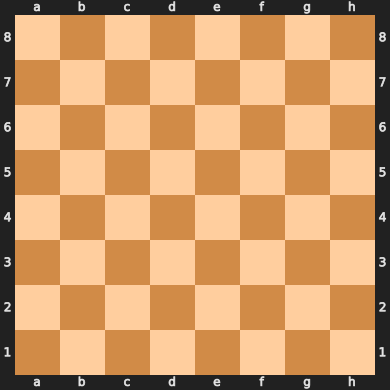

White: ('P', 'a2')


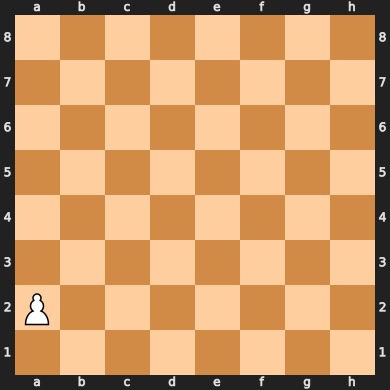

Black: ('p', 'a6')


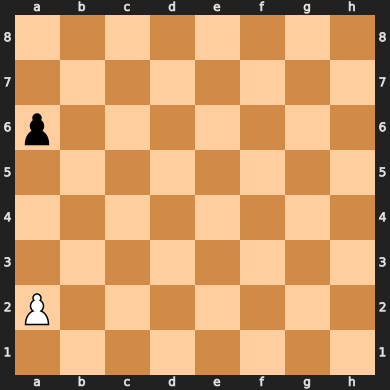

White: ('P', 'h2')


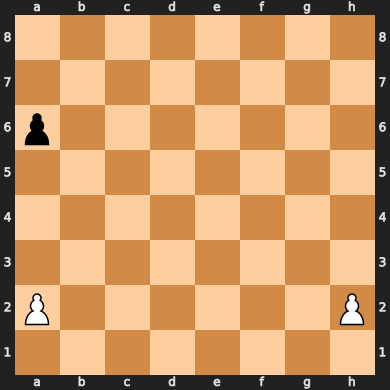

Black: ('p', 'e7')


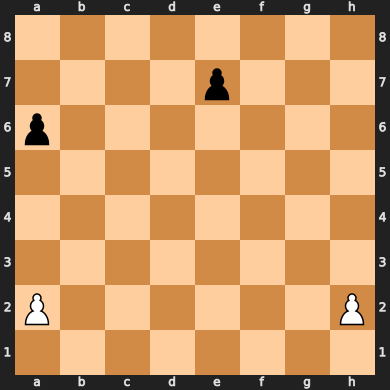

White: ('P', 'a3')


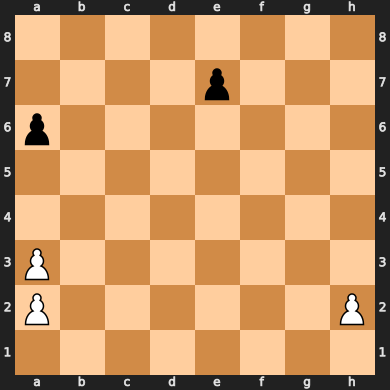

Black: ('p', 'h7')


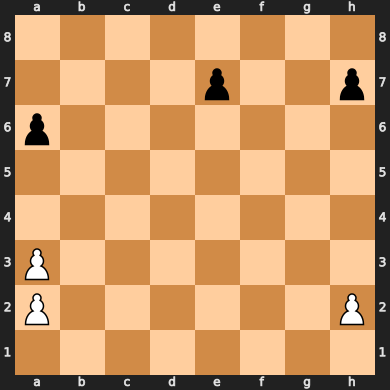

White: ('P', 'b3')


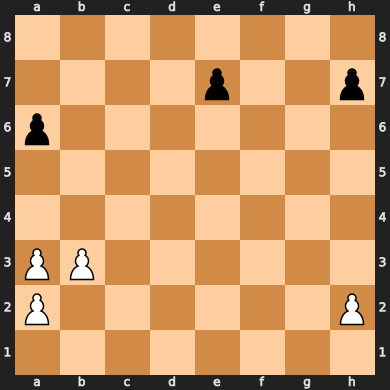

Black: ('p', 'b6')


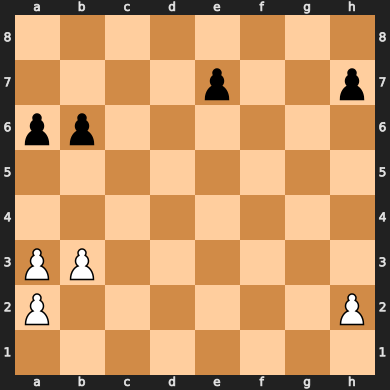

White: ('P', 'g2')


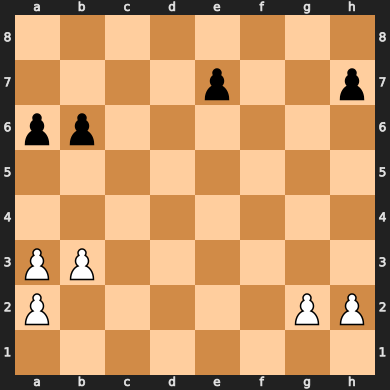

Black: ('p', 'f7')


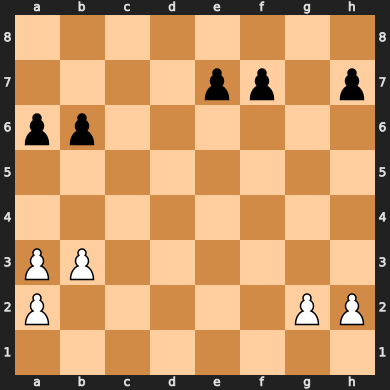

White: ('P', 'e2')


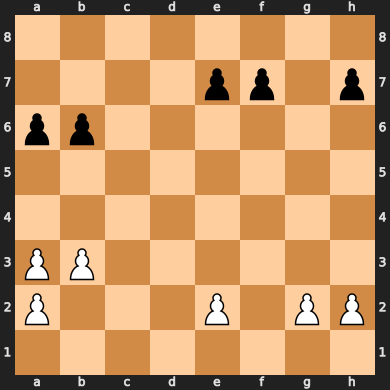

Black: ('p', 'g7')


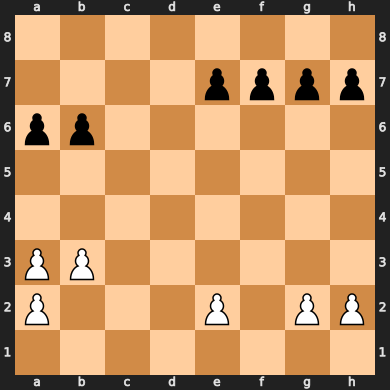

White: ('R', 'f1')


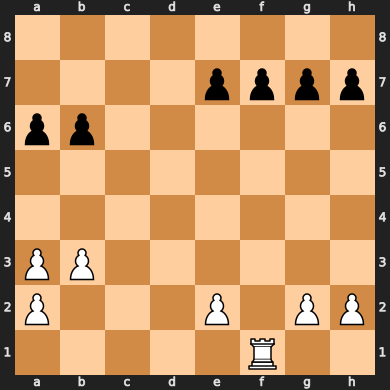

Black: ('q', 'h8')


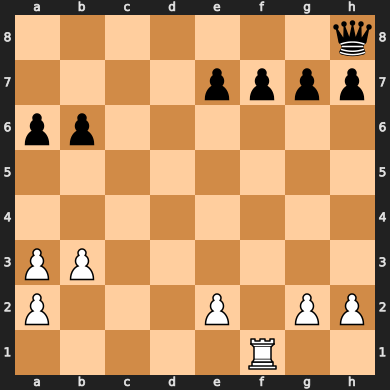

White: ('P', 'g3')


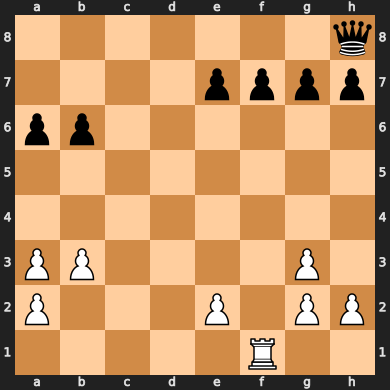

Black: ('b', 'b8')


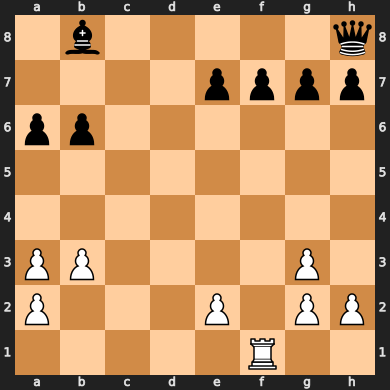

White: ('N', 'd1')


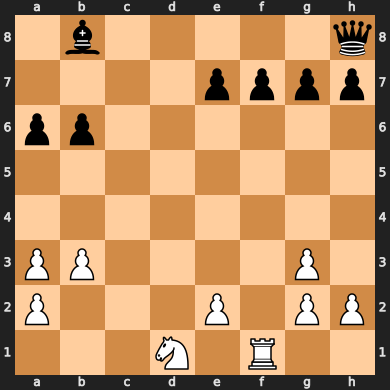

Black: ('n', 'b7')


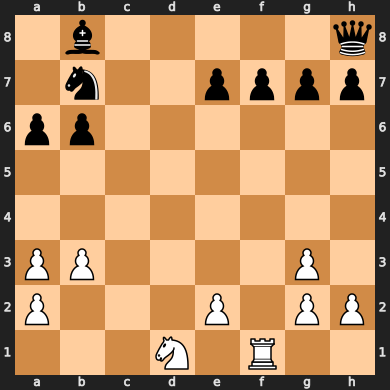

White: ('Q', 'f2')


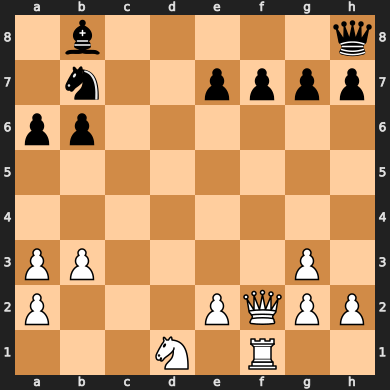

Black: ('r', 'd8')


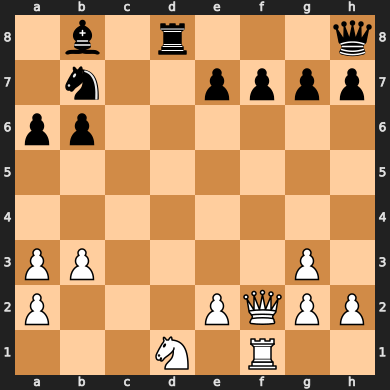

White: ('Q', 'g1')


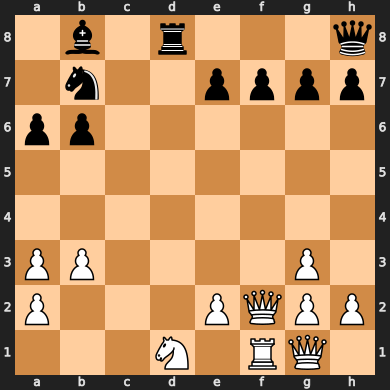

Black: ('p', 'h6')


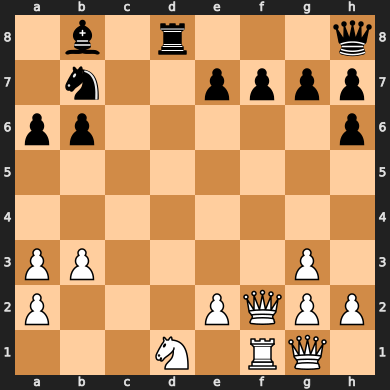

White: ('P', 'c2')


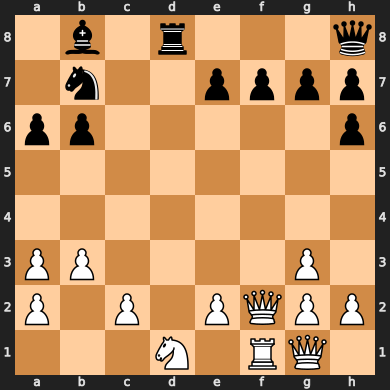

Black: ('r', 'a7')


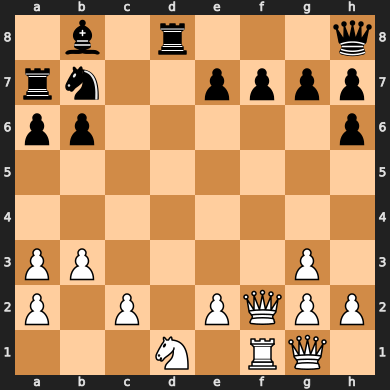

White: ('N', 'a1')


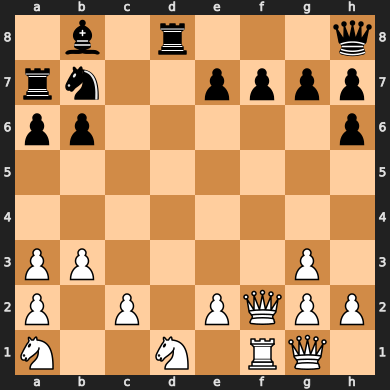

Black: ('b', 'f8')


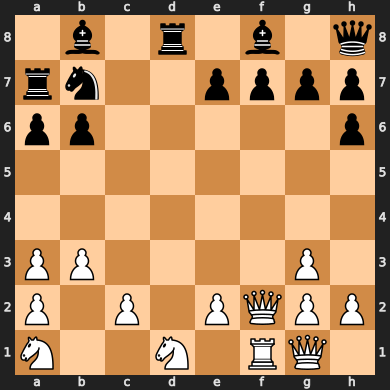

White: ('N', 'b1')


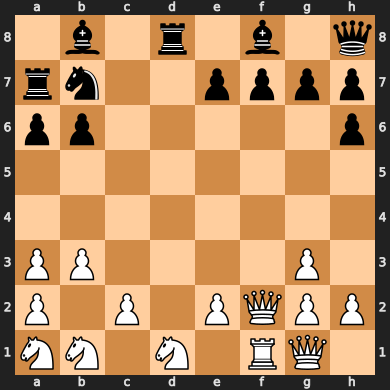

Black: ('n', 'e8')


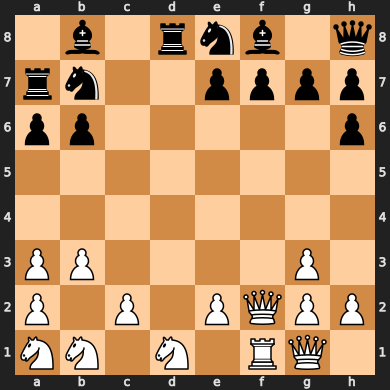

White: ('K', 'h1')


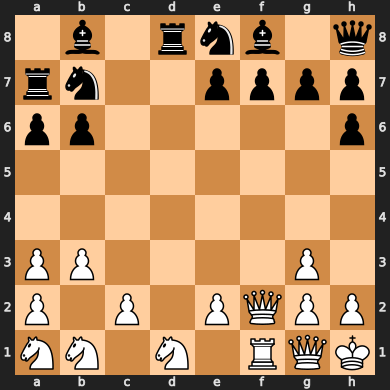

Black: ('p', 'd7')


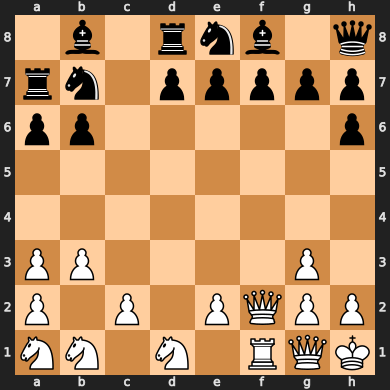

Black: ('k', 'c7')


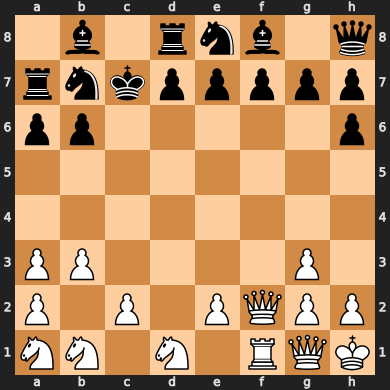

In [6]:
mcts_strat = mcts_player()
game = automate.AutomateGame()
pos = game.initial_position()
ICD.display(pos.get_chess_board())
while not pos.game_over():
    move_list = pos.legal_moves()
    if len(move_list) == 0:
        break
    if pos.turn:
        m = mcts_strat(pos)
        print("White:", m)
    else:
        m = random.choice(move_list)
        print("Black:", m)
    pos = pos.result(*m)
    ICD.display(pos.get_chess_board())

### Stockfish simulation
Once all the pieces are placed, stockfish simulates the game

white played 1.b4


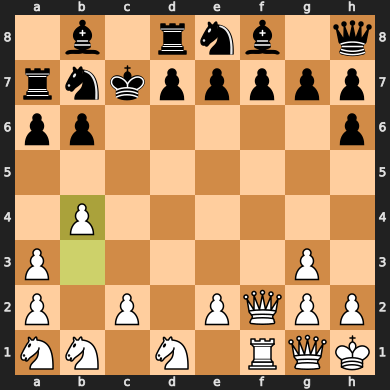

black played 1...Nbd6


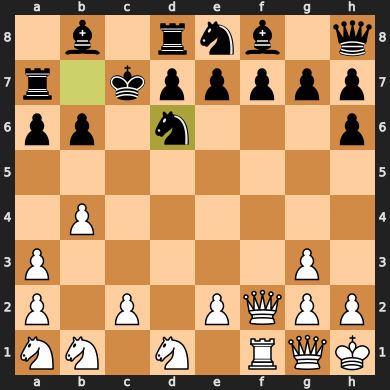

white played 2.Nd2


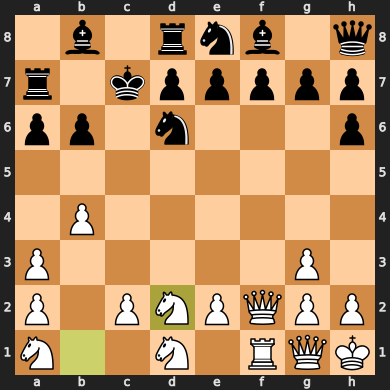

black played 2...Kb7


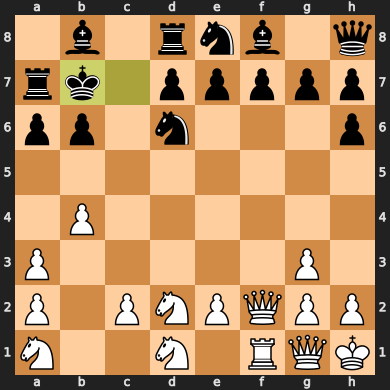

white played 3.Qf3+


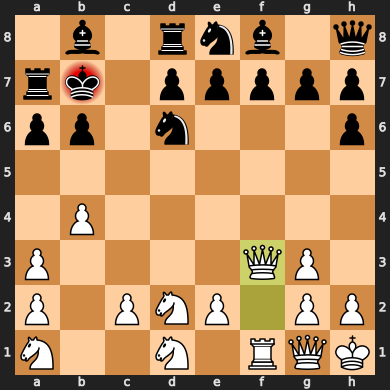

black played 3...Ne4


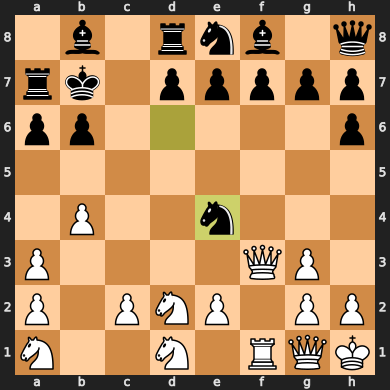

white played 4.Nxe4


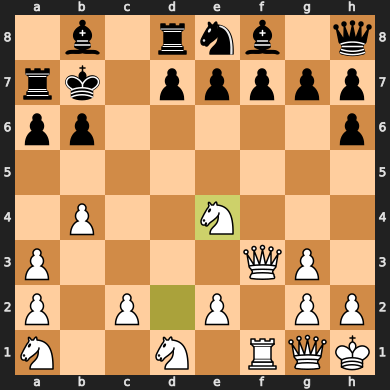

black played 4...d5


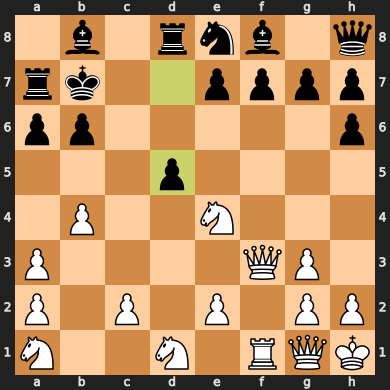

white played 5.Nec3


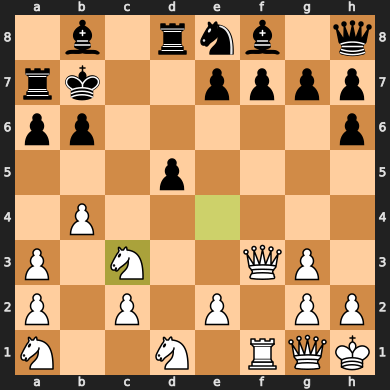

black played 5...g5


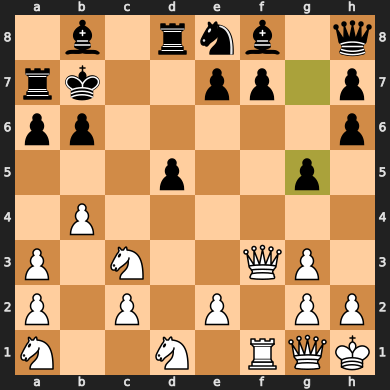

white played 6.Nxd5


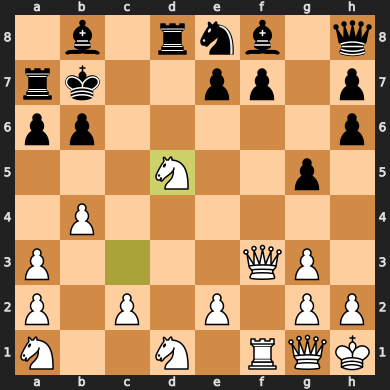

black played 6...Rxd5


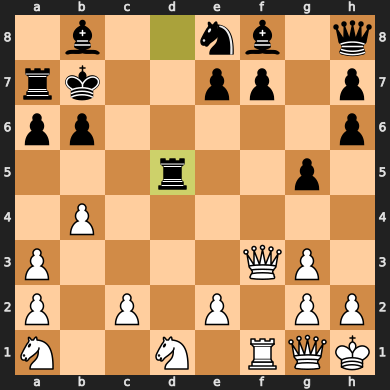

white played 7.Qxd5+


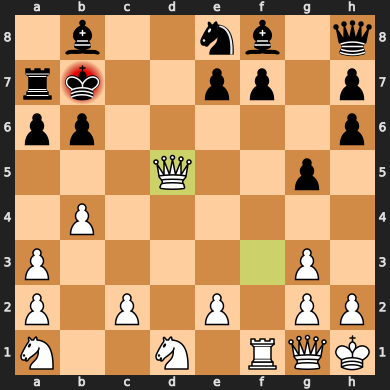

black played 7...Kc7


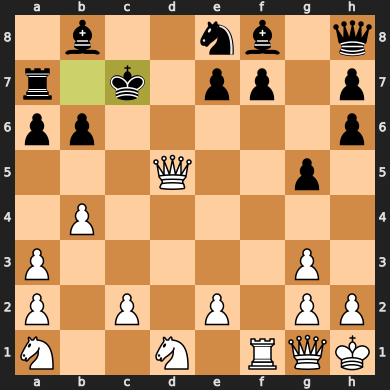

white played 8.b5


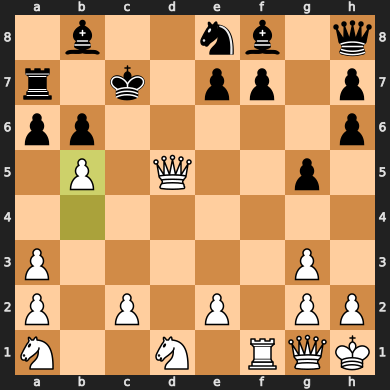

black played 8...Kc8


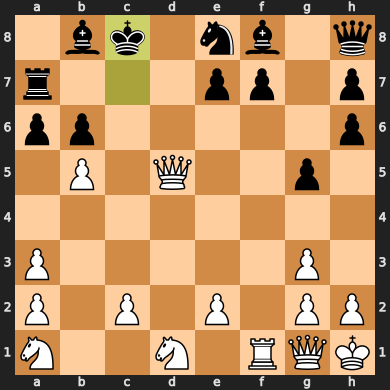

white played 9.Qxf7


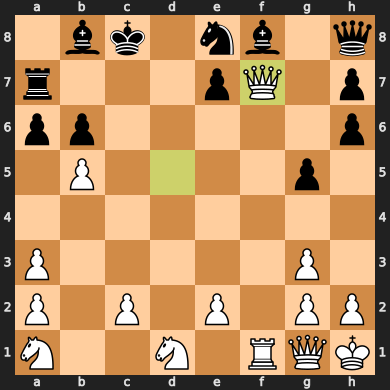

black played 9...Nd6


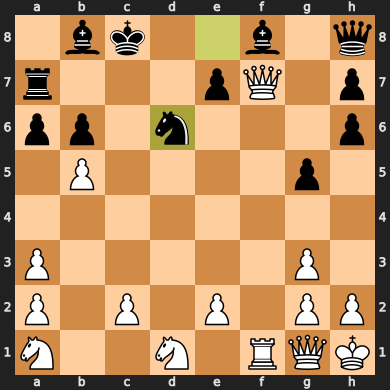

white played 10.Qxf8+


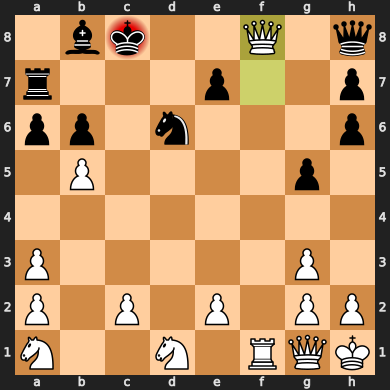

black played 10...Qxf8


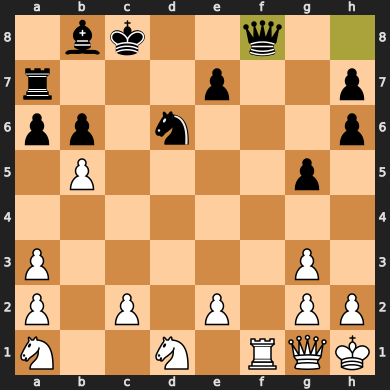

white played 11.Rxf8+


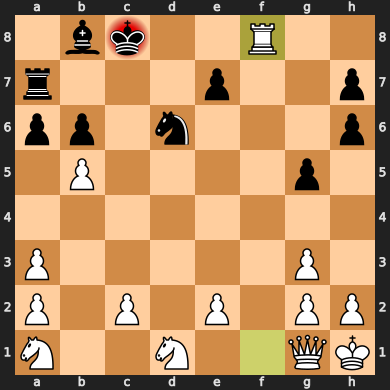

black played 11...Kc7


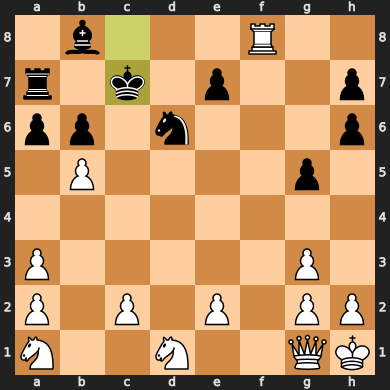

white played 12.bxa6


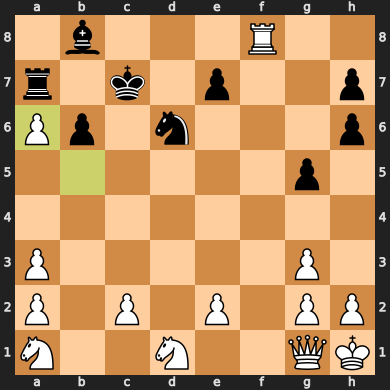

black played 12...Rxa6


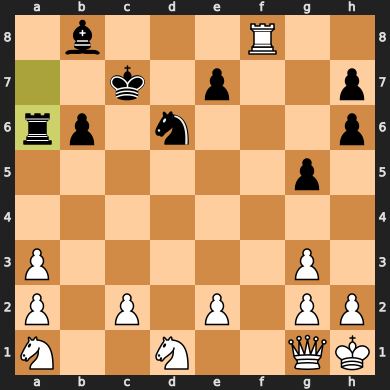

white played 13.Qe3


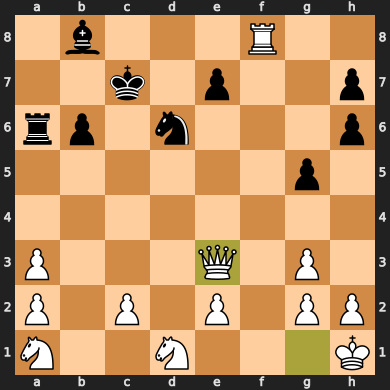

black played 13...Ra8


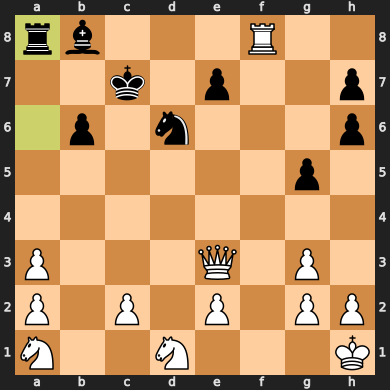

white played 14.Qf3


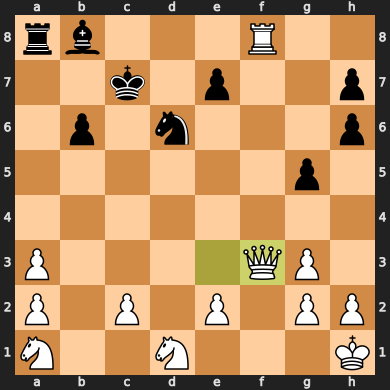

black played 14...Ra4


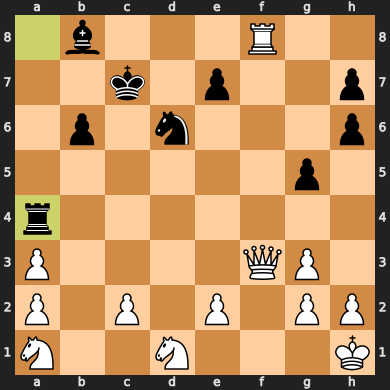

white played 15.Nc3


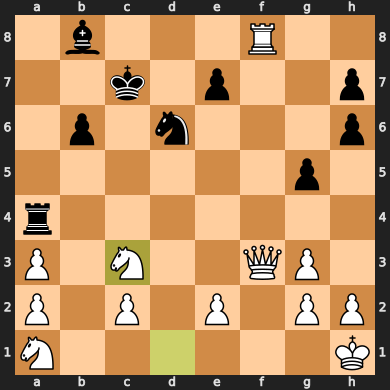

black played 15...b5


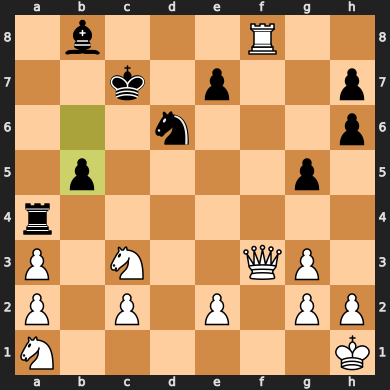

white played 16.Nd5+


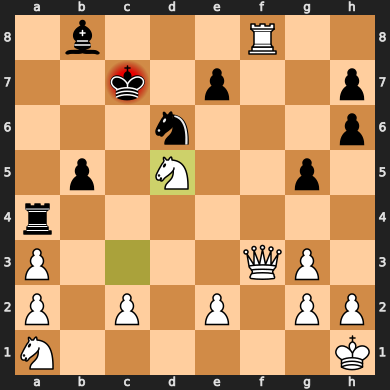

black played 16...Kd7


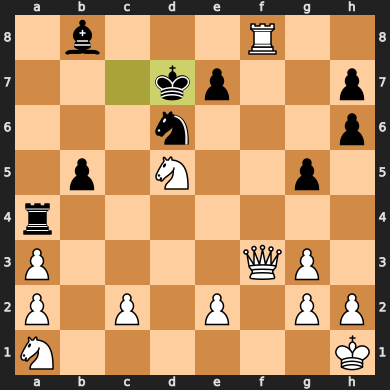

white played 17.Rxb8


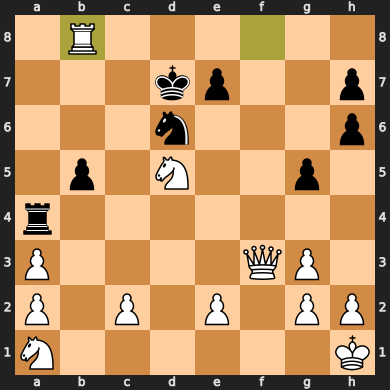

black played 17...Rd4


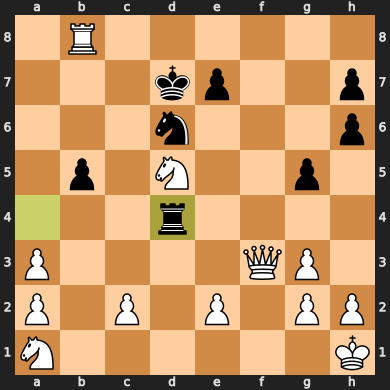

white played 18.Nc3


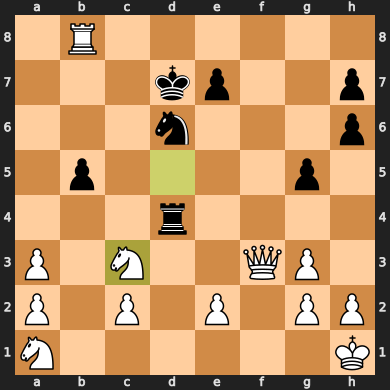

black played 18...Rd2


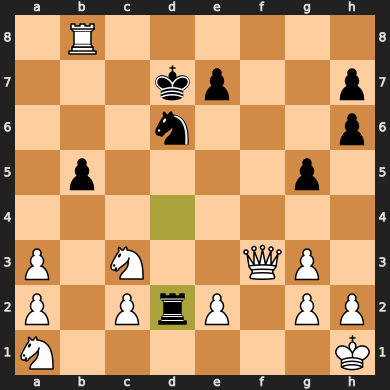

white played 19.Qe3


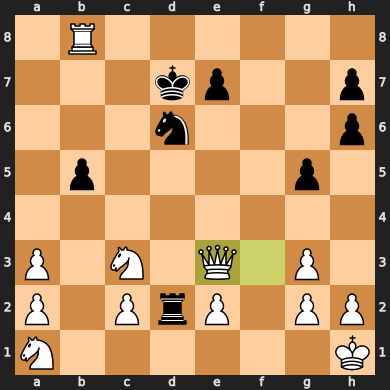

black played 19...Ne4


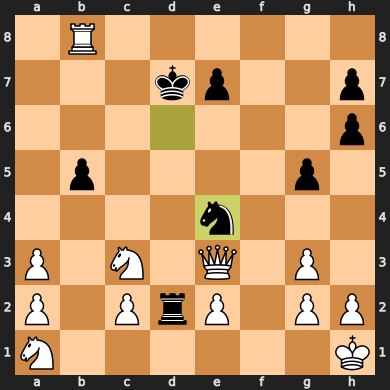

white played 20.Rb7+


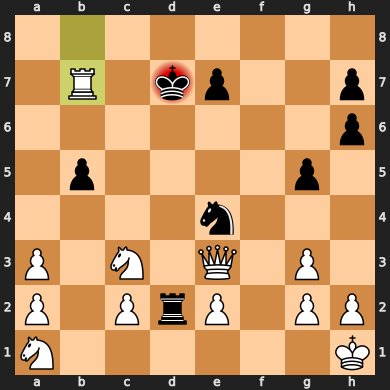

black played 20...Ke8


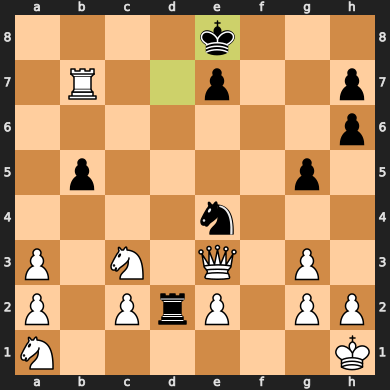

white played 21.Qxe4


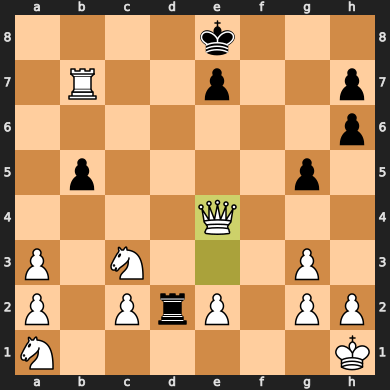

black played 21...Rd7


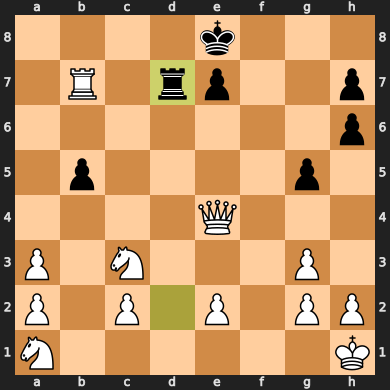

white played 22.Qc6


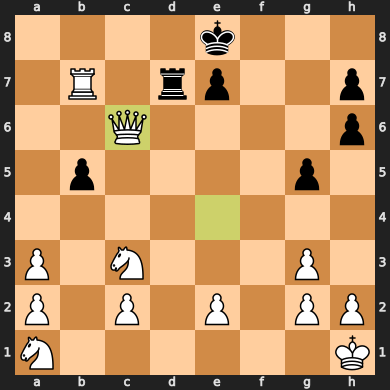

black played 22...Kf7


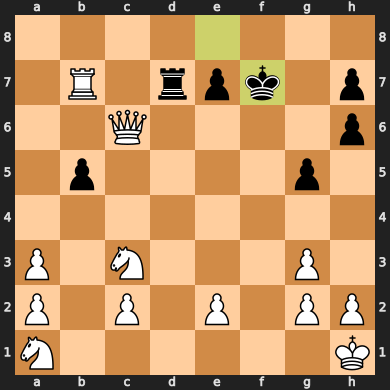

white played 23.Qxd7


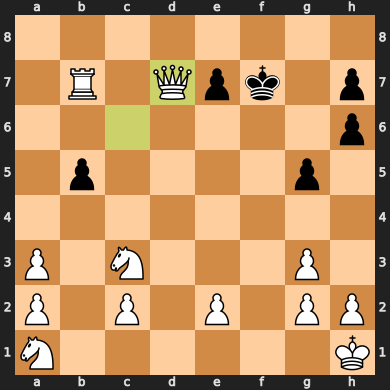

black played 23...Kf6


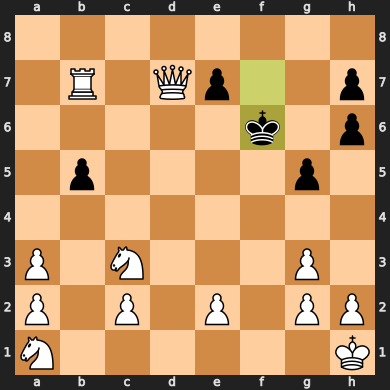

white played 24.Qxe7+


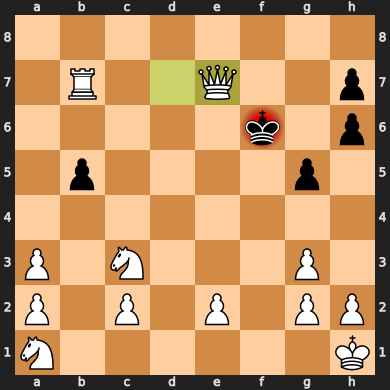

black played 24...Kf5


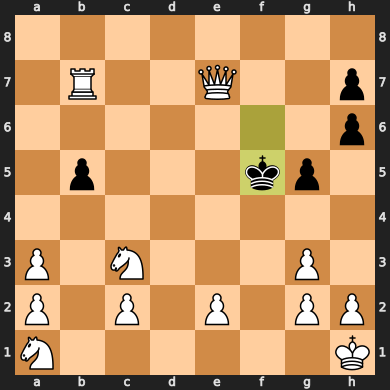

white played 25.Qe4+


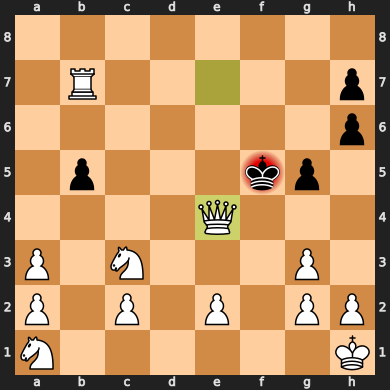

black played 25...Kf6


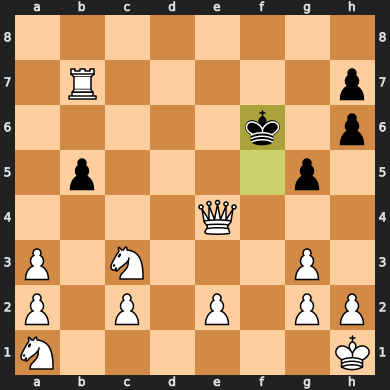

white played 26.Nd5#


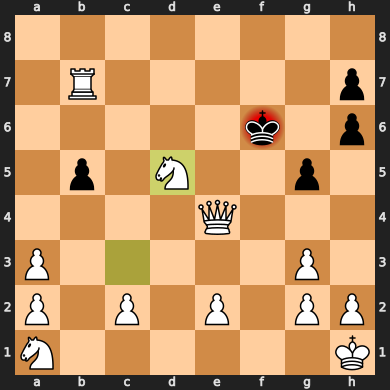

. . . . . . . .
. R . . . . . p
. . . . . k . p
. p . N . . p .
. . . . Q . . .
P . . . . . P .
P . P . P . P P
N . . . . . . K
Final position FEN:  8/1R5p/5k1p/1p1N2p1/4Q3/P5P1/P1P1P1PP/N6K b - - 4 26
-----


In [7]:
dictsidetomove = {True:'white',False:'black'}
notationdict = {True:'.', False:'...'}
board = pos.get_chess_board()
while not board.is_game_over():
    result = engine.play(board,chess.engine.Limit(time=constants.PONDER_TIME))
    print(dictsidetomove[board.turn]+' played '+str(board.fullmove_number)+notationdict[board.turn]+str(board.san(result.move)))
    board.push(result.move)
    ICD.display(board)
print(board)
print('Final position FEN: ',board.fen())
print('-----')

## Game 3: Human (white) vs MCTS agent (black)

Define MCTS agent

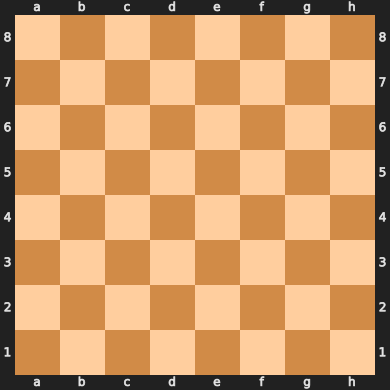

Turn: white
Legal Moves: [('P', 'a2'), ('P', 'a3'), ('P', 'b2'), ('P', 'b3'), ('P', 'c2'), ('P', 'c3'), ('P', 'd2'), ('P', 'd3'), ('P', 'e2'), ('P', 'e3'), ('P', 'f2'), ('P', 'f3'), ('P', 'g2'), ('P', 'g3'), ('P', 'h2'), ('P', 'h3')]


In [45]:
mcts_strat = mcts_player()
game = automate.AutomateGame()
pos = game.initial_position()
ICD.display(pos.get_chess_board())
if not pos.game_over():
    move_list = pos.legal_moves()
    print('Turn:', "white" if pos.turn else "black")
    print('Legal Moves:', move_list)
else:
    print('No legal moves available')

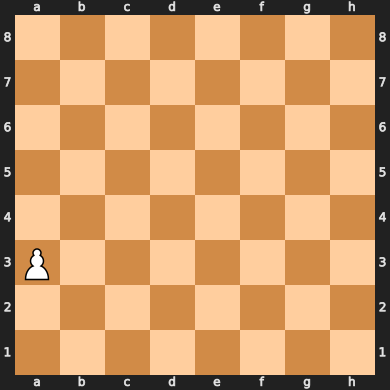

Turn: black
Legal Moves: [('p', 'a6'), ('p', 'a7'), ('p', 'b6'), ('p', 'b7'), ('p', 'c6'), ('p', 'c7'), ('p', 'd6'), ('p', 'd7'), ('p', 'e6'), ('p', 'e7'), ('p', 'f6'), ('p', 'f7'), ('p', 'g6'), ('p', 'g7'), ('p', 'h6'), ('p', 'h7')]


In [46]:
# Human's turn
m = ('P', 'a3')
pos = pos.result(*m)
ICD.display(pos.get_chess_board())
if not pos.game_over():
    move_list = pos.legal_moves()
    print('Turn:', "white" if pos.turn else "black")
    print('Legal Moves:', move_list)
else:
    print('No legal moves available')

MCTS Agent Played: ('p', 'g7')


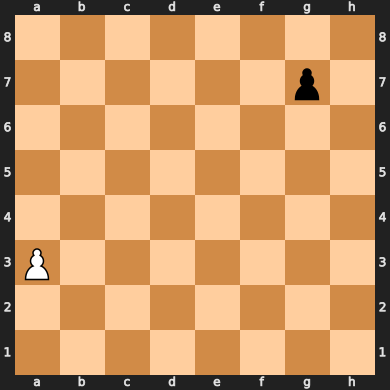

Turn: white
Legal Moves: [('P', 'a2'), ('P', 'b2'), ('P', 'b3'), ('P', 'c2'), ('P', 'c3'), ('P', 'd2'), ('P', 'd3'), ('P', 'e2'), ('P', 'e3'), ('P', 'f2'), ('P', 'f3'), ('P', 'g2'), ('P', 'g3'), ('P', 'h2'), ('P', 'h3')]


In [47]:
# Agent's turn
if not pos.turn:
    m = mcts_strat(pos)
    print("MCTS Agent Played:", m)
    pos = pos.result(*m)
    ICD.display(pos.get_chess_board())
if not pos.game_over():
    move_list = pos.legal_moves()
    print('Turn:', "white" if pos.turn else "black")
    print('Legal Moves:', move_list)
else:
    print('No legal moves available')

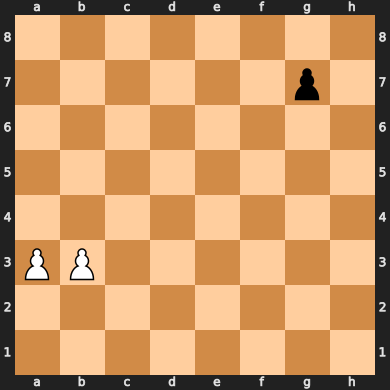

Turn: black
Legal Moves: [('p', 'a6'), ('p', 'a7'), ('p', 'b6'), ('p', 'b7'), ('p', 'c6'), ('p', 'c7'), ('p', 'd6'), ('p', 'd7'), ('p', 'e6'), ('p', 'e7'), ('p', 'f6'), ('p', 'f7'), ('p', 'g6'), ('p', 'h6'), ('p', 'h7')]


In [48]:
# Human's turn
m = ('P', 'b3')
pos = pos.result(*m)
ICD.display(pos.get_chess_board())
if not pos.game_over():
    move_list = pos.legal_moves()
    print('Turn:', "white" if pos.turn else "black")
    print('Legal Moves:', move_list)
else:
    print('No legal moves available')

MCTS Agent Played: ('p', 'a6')


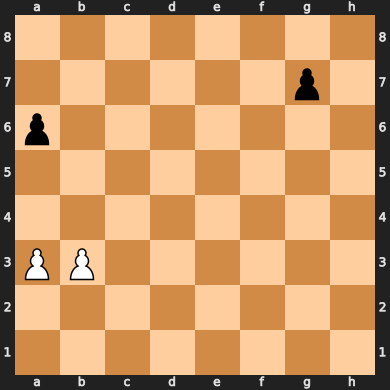

Turn: white
Legal Moves: [('P', 'a2'), ('P', 'b2'), ('P', 'c2'), ('P', 'c3'), ('P', 'd2'), ('P', 'd3'), ('P', 'e2'), ('P', 'e3'), ('P', 'f2'), ('P', 'f3'), ('P', 'g2'), ('P', 'g3'), ('P', 'h2'), ('P', 'h3')]


In [49]:
# Agent's turn
if not pos.turn:
    m = mcts_strat(pos)
    print("MCTS Agent Played:", m)
    pos = pos.result(*m)
    ICD.display(pos.get_chess_board())
if not pos.game_over():
    move_list = pos.legal_moves()
    print('Turn:', "white" if pos.turn else "black")
    print('Legal Moves:', move_list)
else:
    print('No legal moves available')

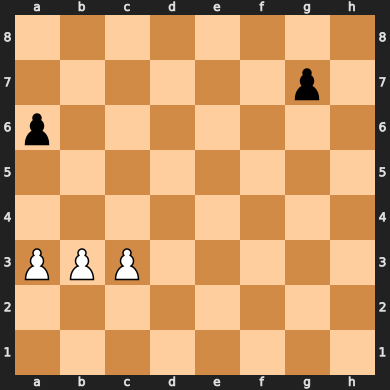

Turn: black
Legal Moves: [('p', 'a7'), ('p', 'b6'), ('p', 'b7'), ('p', 'c6'), ('p', 'c7'), ('p', 'd6'), ('p', 'd7'), ('p', 'e6'), ('p', 'e7'), ('p', 'f6'), ('p', 'f7'), ('p', 'g6'), ('p', 'h6'), ('p', 'h7')]


In [50]:
# Human's turn
m = ('P', 'c3')
pos = pos.result(*m)
ICD.display(pos.get_chess_board())
if not pos.game_over():
    move_list = pos.legal_moves()
    print('Turn:', "white" if pos.turn else "black")
    print('Legal Moves:', move_list)
else:
    print('No legal moves available')

MCTS Agent Played: ('p', 'e6')


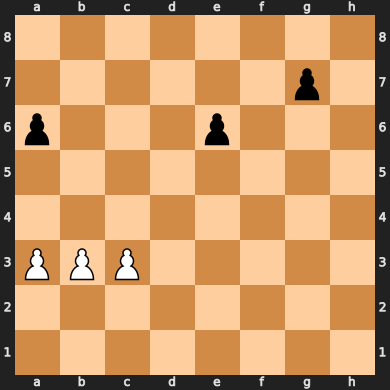

Turn: white
Legal Moves: [('P', 'a2'), ('P', 'b2'), ('P', 'c2'), ('P', 'd2'), ('P', 'd3'), ('P', 'e2'), ('P', 'e3'), ('P', 'f2'), ('P', 'f3'), ('P', 'g2'), ('P', 'g3'), ('P', 'h2'), ('P', 'h3')]


In [51]:
# Agent's turn
if not pos.turn:
    m = mcts_strat(pos)
    print("MCTS Agent Played:", m)
    pos = pos.result(*m)
    ICD.display(pos.get_chess_board())
if not pos.game_over():
    move_list = pos.legal_moves()
    print('Turn:', "white" if pos.turn else "black")
    print('Legal Moves:', move_list)
else:
    print('No legal moves available')

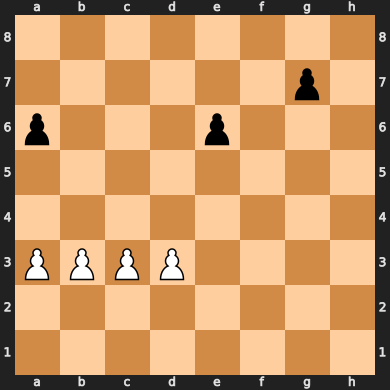

Turn: black
Legal Moves: [('p', 'a7'), ('p', 'b6'), ('p', 'b7'), ('p', 'c6'), ('p', 'c7'), ('p', 'd6'), ('p', 'd7'), ('p', 'e7'), ('p', 'f6'), ('p', 'f7'), ('p', 'g6'), ('p', 'h6'), ('p', 'h7')]


In [52]:
# Human's turn
m = ('P', 'd3')
pos = pos.result(*m)
ICD.display(pos.get_chess_board())
if not pos.game_over():
    move_list = pos.legal_moves()
    print('Turn:', "white" if pos.turn else "black")
    print('Legal Moves:', move_list)
else:
    print('No legal moves available')

MCTS Agent Played: ('p', 'h7')


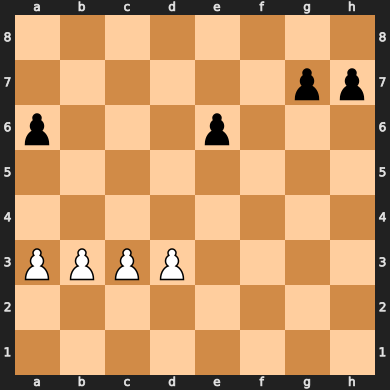

Turn: white
Legal Moves: [('P', 'a2'), ('P', 'b2'), ('P', 'c2'), ('P', 'd2'), ('P', 'e2'), ('P', 'e3'), ('P', 'f2'), ('P', 'f3'), ('P', 'g2'), ('P', 'g3'), ('P', 'h2'), ('P', 'h3')]


In [53]:
# Agent's turn
if not pos.turn:
    m = mcts_strat(pos)
    print("MCTS Agent Played:", m)
    pos = pos.result(*m)
    ICD.display(pos.get_chess_board())
if not pos.game_over():
    move_list = pos.legal_moves()
    print('Turn:', "white" if pos.turn else "black")
    print('Legal Moves:', move_list)
else:
    print('No legal moves available')

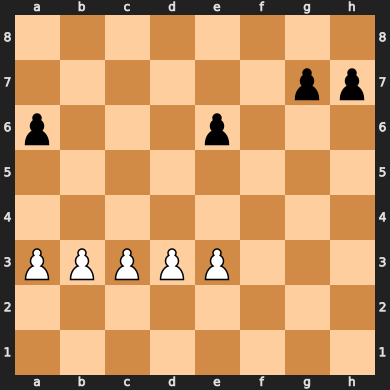

Turn: black
Legal Moves: [('p', 'a7'), ('p', 'b6'), ('p', 'b7'), ('p', 'c6'), ('p', 'c7'), ('p', 'd6'), ('p', 'd7'), ('p', 'e7'), ('p', 'f6'), ('p', 'f7'), ('p', 'g6'), ('p', 'h6')]


In [54]:
# Human's turn
m = ('P', 'e3')
pos = pos.result(*m)
ICD.display(pos.get_chess_board())
if not pos.game_over():
    move_list = pos.legal_moves()
    print('Turn:', "white" if pos.turn else "black")
    print('Legal Moves:', move_list)
else:
    print('No legal moves available')

MCTS Agent Played: ('p', 'c6')


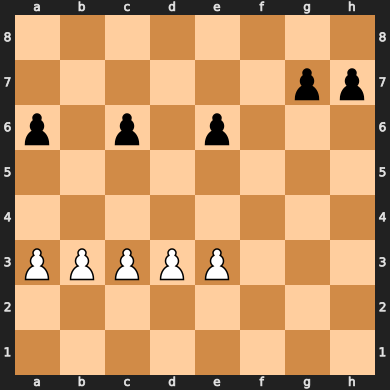

Turn: white
Legal Moves: [('P', 'a2'), ('P', 'b2'), ('P', 'c2'), ('P', 'd2'), ('P', 'e2'), ('P', 'f2'), ('P', 'f3'), ('P', 'g2'), ('P', 'g3'), ('P', 'h2'), ('P', 'h3')]


In [55]:
# Agent's turn
if not pos.turn:
    m = mcts_strat(pos)
    print("MCTS Agent Played:", m)
    pos = pos.result(*m)
    ICD.display(pos.get_chess_board())
if not pos.game_over():
    move_list = pos.legal_moves()
    print('Turn:', "white" if pos.turn else "black")
    print('Legal Moves:', move_list)
else:
    print('No legal moves available')

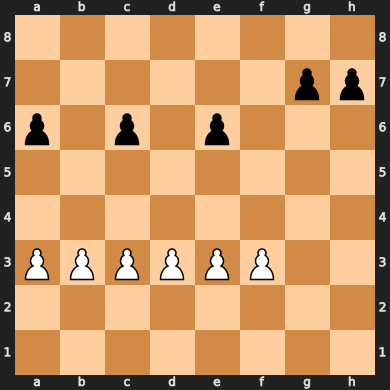

Turn: black
Legal Moves: [('p', 'a7'), ('p', 'b6'), ('p', 'b7'), ('p', 'c7'), ('p', 'd6'), ('p', 'd7'), ('p', 'e7'), ('p', 'f6'), ('p', 'f7'), ('p', 'g6'), ('p', 'h6')]


In [56]:
# Human's turn
m = ('P', 'f3')
pos = pos.result(*m)
ICD.display(pos.get_chess_board())
if not pos.game_over():
    move_list = pos.legal_moves()
    print('Turn:', "white" if pos.turn else "black")
    print('Legal Moves:', move_list)
else:
    print('No legal moves available')

MCTS Agent Played: ('p', 'd6')


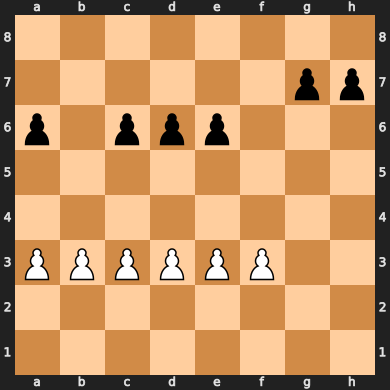

Turn: white
Legal Moves: [('P', 'a2'), ('P', 'b2'), ('P', 'c2'), ('P', 'd2'), ('P', 'e2'), ('P', 'f2'), ('P', 'g2'), ('P', 'g3'), ('P', 'h2'), ('P', 'h3'), ('N', 'a1'), ('N', 'a2'), ('N', 'b1'), ('N', 'b2'), ('N', 'c1'), ('N', 'c2'), ('N', 'd1'), ('N', 'd2'), ('N', 'e1'), ('N', 'e2'), ('N', 'f1'), ('N', 'f2'), ('N', 'g1'), ('N', 'g2'), ('N', 'h1'), ('N', 'h2'), ('B', 'a1'), ('B', 'a2'), ('B', 'b1'), ('B', 'b2'), ('B', 'c1'), ('B', 'c2'), ('B', 'd1'), ('B', 'd2'), ('B', 'e1'), ('B', 'e2'), ('B', 'f1'), ('B', 'f2'), ('B', 'g1'), ('B', 'g2'), ('B', 'h1'), ('B', 'h2'), ('R', 'a1'), ('R', 'a2'), ('R', 'b1'), ('R', 'b2'), ('R', 'c1'), ('R', 'c2'), ('R', 'd1'), ('R', 'd2'), ('R', 'e1'), ('R', 'e2'), ('R', 'f1'), ('R', 'f2'), ('R', 'g1'), ('R', 'g2'), ('R', 'h1'), ('R', 'h2'), ('Q', 'a1'), ('Q', 'a2'), ('Q', 'b1'), ('Q', 'b2'), ('Q', 'c1'), ('Q', 'c2'), ('Q', 'd1'), ('Q', 'd2'), ('Q', 'e1'), ('Q', 'e2'), ('Q', 'f1'), ('Q', 'f2'), ('Q', 'g1'), ('Q', 'g2'), ('Q', 'h1'), ('Q', 'h2')]


In [57]:
# Agent's turn
if not pos.turn:
    m = mcts_strat(pos)
    print("MCTS Agent Played:", m)
    pos = pos.result(*m)
    ICD.display(pos.get_chess_board())
if not pos.game_over():
    move_list = pos.legal_moves()
    print('Turn:', "white" if pos.turn else "black")
    print('Legal Moves:', move_list)
else:
    print('No legal moves available')

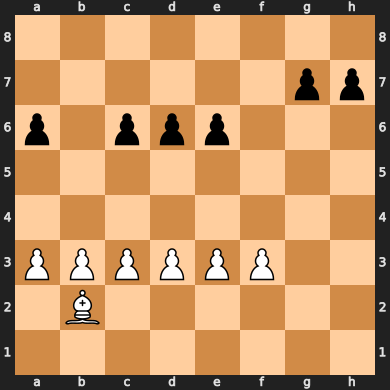

Turn: black
Legal Moves: [('p', 'a7'), ('p', 'b6'), ('p', 'b7'), ('p', 'c7'), ('p', 'd7'), ('p', 'e7'), ('p', 'f6'), ('p', 'f7'), ('p', 'g6'), ('p', 'h6'), ('n', 'a8'), ('n', 'a7'), ('n', 'b8'), ('n', 'b7'), ('n', 'c8'), ('n', 'c7'), ('n', 'd8'), ('n', 'd7'), ('n', 'e8'), ('n', 'e7'), ('n', 'f8'), ('n', 'f7'), ('n', 'g8'), ('n', 'h8'), ('b', 'a8'), ('b', 'a7'), ('b', 'b8'), ('b', 'b7'), ('b', 'c8'), ('b', 'c7'), ('b', 'd8'), ('b', 'd7'), ('b', 'e8'), ('b', 'e7'), ('b', 'f8'), ('b', 'f7'), ('b', 'g8'), ('b', 'h8'), ('r', 'a8'), ('r', 'a7'), ('r', 'b8'), ('r', 'b7'), ('r', 'c8'), ('r', 'c7'), ('r', 'd8'), ('r', 'd7'), ('r', 'e8'), ('r', 'e7'), ('r', 'f8'), ('r', 'f7'), ('r', 'g8'), ('r', 'h8'), ('q', 'a8'), ('q', 'a7'), ('q', 'b8'), ('q', 'b7'), ('q', 'c8'), ('q', 'c7'), ('q', 'd8'), ('q', 'd7'), ('q', 'e8'), ('q', 'e7'), ('q', 'f8'), ('q', 'f7'), ('q', 'g8'), ('q', 'h8')]


In [58]:
# Human's turn
m = ('B', 'b2')
pos = pos.result(*m)
ICD.display(pos.get_chess_board())
if not pos.game_over():
    move_list = pos.legal_moves()
    print('Turn:', "white" if pos.turn else "black")
    print('Legal Moves:', move_list)
else:
    print('No legal moves available')

MCTS Agent Played: ('q', 'f7')


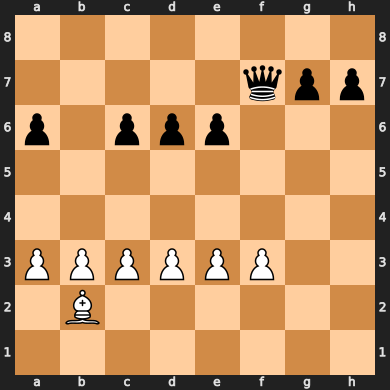

Turn: white
Legal Moves: [('P', 'a2'), ('P', 'c2'), ('P', 'd2'), ('P', 'e2'), ('P', 'f2'), ('P', 'g2'), ('P', 'g3'), ('P', 'h2'), ('P', 'h3'), ('N', 'a1'), ('N', 'a2'), ('N', 'b1'), ('N', 'c1'), ('N', 'c2'), ('N', 'd1'), ('N', 'd2'), ('N', 'e1'), ('N', 'e2'), ('N', 'f1'), ('N', 'f2'), ('N', 'g1'), ('N', 'g2'), ('N', 'h1'), ('N', 'h2'), ('B', 'a1'), ('B', 'a2'), ('B', 'b1'), ('B', 'c1'), ('B', 'c2'), ('B', 'd1'), ('B', 'd2'), ('B', 'e1'), ('B', 'e2'), ('B', 'f1'), ('B', 'f2'), ('B', 'g1'), ('B', 'g2'), ('B', 'h1'), ('B', 'h2'), ('R', 'a1'), ('R', 'a2'), ('R', 'b1'), ('R', 'c1'), ('R', 'c2'), ('R', 'd1'), ('R', 'd2'), ('R', 'e1'), ('R', 'e2'), ('R', 'f1'), ('R', 'f2'), ('R', 'g1'), ('R', 'g2'), ('R', 'h1'), ('R', 'h2'), ('Q', 'a1'), ('Q', 'a2'), ('Q', 'b1'), ('Q', 'c1'), ('Q', 'c2'), ('Q', 'd1'), ('Q', 'd2'), ('Q', 'e1'), ('Q', 'e2'), ('Q', 'f1'), ('Q', 'f2'), ('Q', 'g1'), ('Q', 'g2'), ('Q', 'h1'), ('Q', 'h2')]


In [59]:
# Agent's turn
if not pos.turn:
    m = mcts_strat(pos)
    print("MCTS Agent Played:", m)
    pos = pos.result(*m)
    ICD.display(pos.get_chess_board())
if not pos.game_over():
    move_list = pos.legal_moves()
    print('Turn:', "white" if pos.turn else "black")
    print('Legal Moves:', move_list)
else:
    print('No legal moves available')

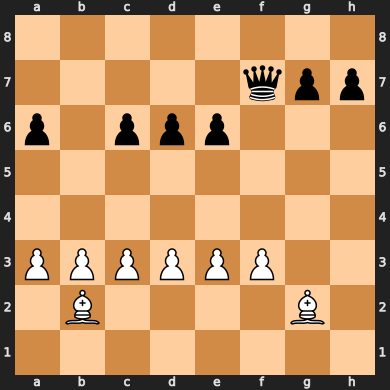

Turn: black
Legal Moves: [('p', 'a7'), ('p', 'b6'), ('p', 'b7'), ('p', 'c7'), ('p', 'd7'), ('p', 'e7'), ('p', 'f6'), ('p', 'g6'), ('p', 'h6'), ('n', 'a8'), ('n', 'a7'), ('n', 'b8'), ('n', 'b7'), ('n', 'c8'), ('n', 'c7'), ('n', 'd8'), ('n', 'd7'), ('n', 'e8'), ('n', 'e7'), ('n', 'f8'), ('n', 'g8'), ('n', 'h8'), ('b', 'a8'), ('b', 'a7'), ('b', 'b8'), ('b', 'b7'), ('b', 'c8'), ('b', 'c7'), ('b', 'd8'), ('b', 'd7'), ('b', 'e8'), ('b', 'e7'), ('b', 'f8'), ('b', 'g8'), ('b', 'h8'), ('r', 'a8'), ('r', 'a7'), ('r', 'b8'), ('r', 'b7'), ('r', 'c8'), ('r', 'c7'), ('r', 'd8'), ('r', 'd7'), ('r', 'e8'), ('r', 'e7'), ('r', 'f8'), ('r', 'g8'), ('r', 'h8'), ('q', 'a8'), ('q', 'a7'), ('q', 'b8'), ('q', 'b7'), ('q', 'c8'), ('q', 'c7'), ('q', 'd8'), ('q', 'd7'), ('q', 'e8'), ('q', 'e7'), ('q', 'f8'), ('q', 'g8'), ('q', 'h8')]


In [60]:
# Human's turn
m = ('B', 'g2')
pos = pos.result(*m)
ICD.display(pos.get_chess_board())
if not pos.game_over():
    move_list = pos.legal_moves()
    print('Turn:', "white" if pos.turn else "black")
    print('Legal Moves:', move_list)
else:
    print('No legal moves available')

MCTS Agent Played: ('b', 'f8')


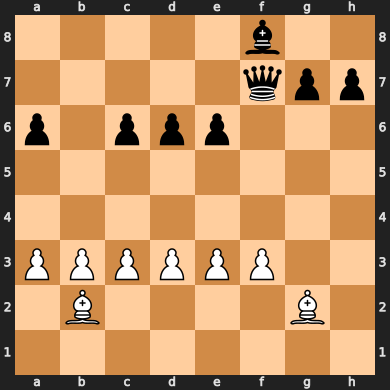

Turn: white
Legal Moves: [('P', 'a2'), ('P', 'c2'), ('P', 'd2'), ('P', 'e2'), ('P', 'f2'), ('P', 'g3'), ('P', 'h2'), ('P', 'h3'), ('N', 'a1'), ('N', 'a2'), ('N', 'b1'), ('N', 'c1'), ('N', 'c2'), ('N', 'd1'), ('N', 'd2'), ('N', 'e1'), ('N', 'e2'), ('N', 'f1'), ('N', 'f2'), ('N', 'g1'), ('N', 'h1'), ('N', 'h2'), ('B', 'a1'), ('B', 'a2'), ('B', 'b1'), ('B', 'c1'), ('B', 'c2'), ('B', 'd1'), ('B', 'd2'), ('B', 'e1'), ('B', 'e2'), ('B', 'f1'), ('B', 'f2'), ('B', 'g1'), ('B', 'h1'), ('B', 'h2'), ('R', 'a1'), ('R', 'a2'), ('R', 'b1'), ('R', 'c1'), ('R', 'c2'), ('R', 'd1'), ('R', 'd2'), ('R', 'e1'), ('R', 'e2'), ('R', 'f1'), ('R', 'f2'), ('R', 'g1'), ('R', 'h1'), ('R', 'h2'), ('Q', 'a1'), ('Q', 'a2'), ('Q', 'b1'), ('Q', 'c1'), ('Q', 'c2'), ('Q', 'd1'), ('Q', 'd2'), ('Q', 'e1'), ('Q', 'e2'), ('Q', 'f1'), ('Q', 'f2'), ('Q', 'g1'), ('Q', 'h1'), ('Q', 'h2')]


In [61]:
# Agent's turn
if not pos.turn:
    m = mcts_strat(pos)
    print("MCTS Agent Played:", m)
    pos = pos.result(*m)
    ICD.display(pos.get_chess_board())
if not pos.game_over():
    move_list = pos.legal_moves()
    print('Turn:', "white" if pos.turn else "black")
    print('Legal Moves:', move_list)
else:
    print('No legal moves available')

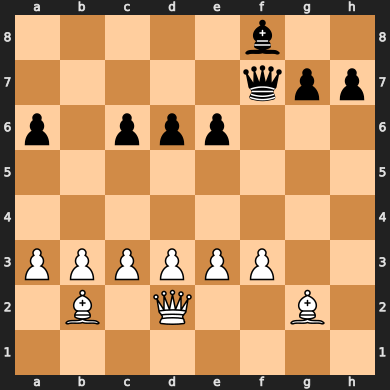

Turn: black
Legal Moves: [('p', 'a7'), ('p', 'b6'), ('p', 'b7'), ('p', 'c7'), ('p', 'd7'), ('p', 'e7'), ('p', 'f6'), ('p', 'g6'), ('p', 'h6'), ('n', 'a8'), ('n', 'a7'), ('n', 'b8'), ('n', 'b7'), ('n', 'c8'), ('n', 'c7'), ('n', 'd8'), ('n', 'd7'), ('n', 'e8'), ('n', 'e7'), ('n', 'g8'), ('n', 'h8'), ('b', 'a8'), ('b', 'a7'), ('b', 'b8'), ('b', 'b7'), ('b', 'c8'), ('b', 'c7'), ('b', 'd8'), ('b', 'd7'), ('b', 'e8'), ('b', 'e7'), ('b', 'g8'), ('b', 'h8'), ('r', 'a8'), ('r', 'a7'), ('r', 'b8'), ('r', 'b7'), ('r', 'c8'), ('r', 'c7'), ('r', 'd8'), ('r', 'd7'), ('r', 'e8'), ('r', 'e7'), ('r', 'g8'), ('r', 'h8'), ('q', 'a8'), ('q', 'a7'), ('q', 'b8'), ('q', 'b7'), ('q', 'c8'), ('q', 'c7'), ('q', 'd8'), ('q', 'd7'), ('q', 'e8'), ('q', 'e7'), ('q', 'g8'), ('q', 'h8')]


In [62]:
# Human's turn
m = ('Q', 'd2')
pos = pos.result(*m)
ICD.display(pos.get_chess_board())
if not pos.game_over():
    move_list = pos.legal_moves()
    print('Turn:', "white" if pos.turn else "black")
    print('Legal Moves:', move_list)
else:
    print('No legal moves available')

MCTS Agent Played: ('q', 'b7')


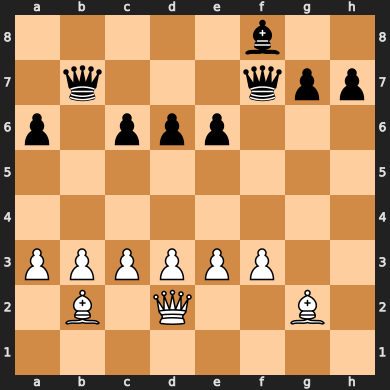

Turn: white
Legal Moves: [('P', 'a2'), ('P', 'c2'), ('P', 'e2'), ('P', 'f2'), ('P', 'g3'), ('P', 'h2'), ('P', 'h3'), ('N', 'a1'), ('N', 'a2'), ('N', 'b1'), ('N', 'c1'), ('N', 'c2'), ('N', 'd1'), ('N', 'e1'), ('N', 'e2'), ('N', 'f1'), ('N', 'f2'), ('N', 'g1'), ('N', 'h1'), ('N', 'h2'), ('B', 'a1'), ('B', 'a2'), ('B', 'b1'), ('B', 'c1'), ('B', 'c2'), ('B', 'd1'), ('B', 'e1'), ('B', 'e2'), ('B', 'f1'), ('B', 'f2'), ('B', 'g1'), ('B', 'h1'), ('B', 'h2'), ('R', 'a1'), ('R', 'a2'), ('R', 'b1'), ('R', 'c1'), ('R', 'c2'), ('R', 'd1'), ('R', 'e1'), ('R', 'e2'), ('R', 'f1'), ('R', 'f2'), ('R', 'g1'), ('R', 'h1'), ('R', 'h2'), ('Q', 'a1'), ('Q', 'a2'), ('Q', 'b1'), ('Q', 'c1'), ('Q', 'c2'), ('Q', 'd1'), ('Q', 'e1'), ('Q', 'e2'), ('Q', 'f1'), ('Q', 'f2'), ('Q', 'g1'), ('Q', 'h1'), ('Q', 'h2')]


In [63]:
# Agent's turn
if not pos.turn:
    m = mcts_strat(pos)
    print("MCTS Agent Played:", m)
    pos = pos.result(*m)
    ICD.display(pos.get_chess_board())
if not pos.game_over():
    move_list = pos.legal_moves()
    print('Turn:', "white" if pos.turn else "black")
    print('Legal Moves:', move_list)
else:
    print('No legal moves available')

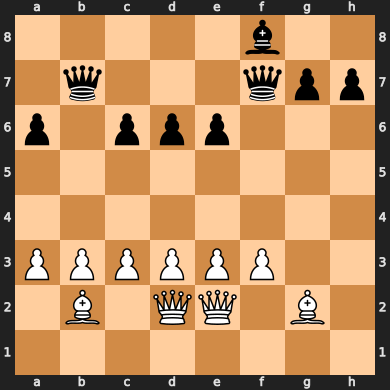

Turn: black
Legal Moves: [('p', 'a7'), ('p', 'b6'), ('p', 'c7'), ('p', 'd7'), ('p', 'e7'), ('p', 'f6'), ('p', 'g6'), ('p', 'h6'), ('n', 'a8'), ('n', 'a7'), ('n', 'b8'), ('n', 'c8'), ('n', 'c7'), ('n', 'd8'), ('n', 'd7'), ('n', 'e8'), ('n', 'e7'), ('n', 'g8'), ('n', 'h8'), ('b', 'a8'), ('b', 'a7'), ('b', 'b8'), ('b', 'c8'), ('b', 'c7'), ('b', 'd8'), ('b', 'd7'), ('b', 'e8'), ('b', 'e7'), ('b', 'g8'), ('b', 'h8'), ('r', 'a8'), ('r', 'a7'), ('r', 'b8'), ('r', 'c8'), ('r', 'c7'), ('r', 'd8'), ('r', 'd7'), ('r', 'e8'), ('r', 'e7'), ('r', 'g8'), ('r', 'h8'), ('q', 'a8'), ('q', 'a7'), ('q', 'b8'), ('q', 'c8'), ('q', 'c7'), ('q', 'd8'), ('q', 'd7'), ('q', 'e8'), ('q', 'e7'), ('q', 'g8'), ('q', 'h8')]


In [64]:
# Human's turn
m = ('Q', 'e2')
pos = pos.result(*m)
ICD.display(pos.get_chess_board())
if not pos.game_over():
    move_list = pos.legal_moves()
    print('Turn:', "white" if pos.turn else "black")
    print('Legal Moves:', move_list)
else:
    print('No legal moves available')

MCTS Agent Played: ('b', 'c8')


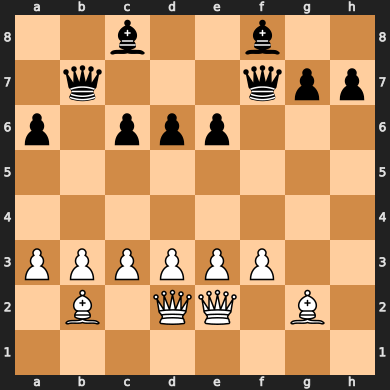

Turn: white
Legal Moves: [('P', 'a2'), ('P', 'c2'), ('P', 'f2'), ('P', 'g3'), ('P', 'h2'), ('P', 'h3'), ('N', 'a1'), ('N', 'a2'), ('N', 'b1'), ('N', 'c1'), ('N', 'c2'), ('N', 'd1'), ('N', 'e1'), ('N', 'f1'), ('N', 'f2'), ('N', 'g1'), ('N', 'h1'), ('N', 'h2'), ('B', 'a1'), ('B', 'a2'), ('B', 'b1'), ('B', 'c1'), ('B', 'c2'), ('B', 'd1'), ('B', 'e1'), ('B', 'f1'), ('B', 'f2'), ('B', 'g1'), ('B', 'h1'), ('B', 'h2'), ('R', 'a1'), ('R', 'a2'), ('R', 'b1'), ('R', 'c1'), ('R', 'c2'), ('R', 'd1'), ('R', 'e1'), ('R', 'f1'), ('R', 'f2'), ('R', 'g1'), ('R', 'h1'), ('R', 'h2'), ('Q', 'a1'), ('Q', 'a2'), ('Q', 'b1'), ('Q', 'c1'), ('Q', 'c2'), ('Q', 'd1'), ('Q', 'e1'), ('Q', 'f1'), ('Q', 'f2'), ('Q', 'g1'), ('Q', 'h1'), ('Q', 'h2')]


In [65]:
# Agent's turn
if not pos.turn:
    m = mcts_strat(pos)
    print("MCTS Agent Played:", m)
    pos = pos.result(*m)
    ICD.display(pos.get_chess_board())
if not pos.game_over():
    move_list = pos.legal_moves()
    print('Turn:', "white" if pos.turn else "black")
    print('Legal Moves:', move_list)
else:
    print('No legal moves available')

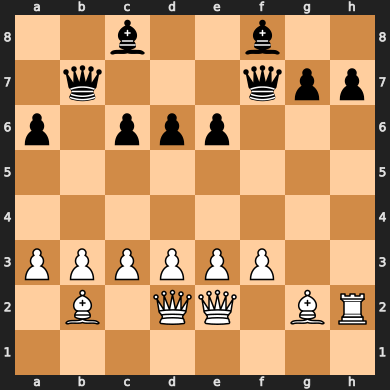

Turn: black
Legal Moves: [('p', 'a7'), ('p', 'b6'), ('p', 'c7'), ('p', 'd7'), ('p', 'e7'), ('p', 'f6'), ('p', 'g6'), ('p', 'h6'), ('n', 'a8'), ('n', 'a7'), ('n', 'b8'), ('n', 'c7'), ('n', 'd8'), ('n', 'd7'), ('n', 'e8'), ('n', 'e7'), ('n', 'g8'), ('n', 'h8'), ('b', 'a8'), ('b', 'a7'), ('b', 'b8'), ('b', 'c7'), ('b', 'd8'), ('b', 'd7'), ('b', 'e8'), ('b', 'e7'), ('b', 'g8'), ('b', 'h8'), ('r', 'a8'), ('r', 'a7'), ('r', 'b8'), ('r', 'c7'), ('r', 'd8'), ('r', 'd7'), ('r', 'e8'), ('r', 'e7'), ('r', 'g8'), ('r', 'h8'), ('q', 'a8'), ('q', 'a7'), ('q', 'b8'), ('q', 'c7'), ('q', 'd8'), ('q', 'd7'), ('q', 'e8'), ('q', 'e7'), ('q', 'g8'), ('q', 'h8')]


In [66]:
# Human's turn
m = ('R', 'h2')
pos = pos.result(*m)
ICD.display(pos.get_chess_board())
if not pos.game_over():
    move_list = pos.legal_moves()
    print('Turn:', "white" if pos.turn else "black")
    print('Legal Moves:', move_list)
else:
    print('No legal moves available')

MCTS Agent Played: ('b', 'e7')


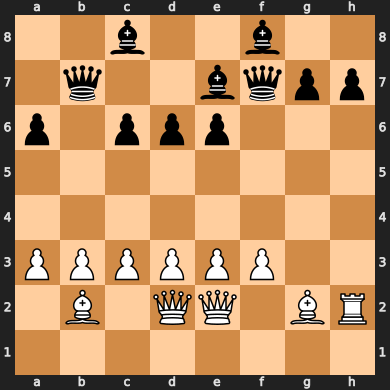

Turn: white
Legal Moves: [('P', 'a2'), ('P', 'c2'), ('P', 'f2'), ('P', 'g3'), ('P', 'h3'), ('N', 'a1'), ('N', 'a2'), ('N', 'b1'), ('N', 'c1'), ('N', 'c2'), ('N', 'd1'), ('N', 'e1'), ('N', 'f1'), ('N', 'f2'), ('N', 'g1'), ('N', 'h1'), ('B', 'a1'), ('B', 'a2'), ('B', 'b1'), ('B', 'c1'), ('B', 'c2'), ('B', 'd1'), ('B', 'e1'), ('B', 'f1'), ('B', 'f2'), ('B', 'g1'), ('B', 'h1'), ('R', 'a1'), ('R', 'a2'), ('R', 'b1'), ('R', 'c1'), ('R', 'c2'), ('R', 'd1'), ('R', 'e1'), ('R', 'f1'), ('R', 'f2'), ('R', 'g1'), ('R', 'h1')]


In [67]:
# Agent's turn
if not pos.turn:
    m = mcts_strat(pos)
    print("MCTS Agent Played:", m)
    pos = pos.result(*m)
    ICD.display(pos.get_chess_board())
if not pos.game_over():
    move_list = pos.legal_moves()
    print('Turn:', "white" if pos.turn else "black")
    print('Legal Moves:', move_list)
else:
    print('No legal moves available')

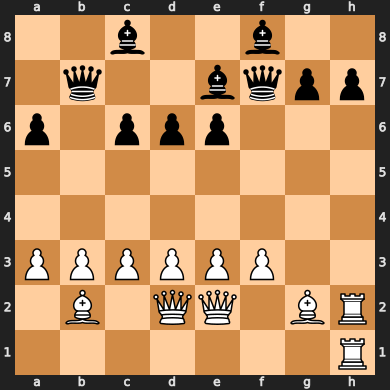

Turn: black
Legal Moves: [('p', 'a7'), ('p', 'b6'), ('p', 'c7'), ('p', 'd7'), ('p', 'f6'), ('p', 'g6'), ('p', 'h6'), ('n', 'a8'), ('n', 'a7'), ('n', 'b8'), ('n', 'c7'), ('n', 'd8'), ('n', 'd7'), ('n', 'e8'), ('n', 'g8'), ('n', 'h8'), ('b', 'a8'), ('b', 'a7'), ('b', 'b8'), ('b', 'c7'), ('b', 'd8'), ('b', 'd7'), ('b', 'e8'), ('b', 'g8'), ('b', 'h8'), ('r', 'a8'), ('r', 'a7'), ('r', 'b8'), ('r', 'c7'), ('r', 'd8'), ('r', 'd7'), ('r', 'e8'), ('r', 'g8'), ('r', 'h8')]


In [68]:
# Human's turn
m = ('R', 'h1')
pos = pos.result(*m)
ICD.display(pos.get_chess_board())
if not pos.game_over():
    move_list = pos.legal_moves()
    print('Turn:', "white" if pos.turn else "black")
    print('Legal Moves:', move_list)
else:
    print('No legal moves available')

MCTS Agent Played: ('r', 'h8')


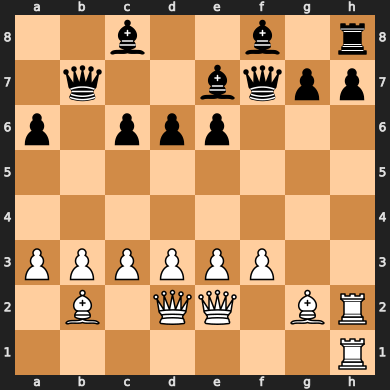

Turn: white
Legal Moves: [('P', 'a2'), ('P', 'c2'), ('P', 'f2'), ('P', 'g3'), ('P', 'h3')]


In [69]:
# Agent's turn
if not pos.turn:
    m = mcts_strat(pos)
    print("MCTS Agent Played:", m)
    pos = pos.result(*m)
    ICD.display(pos.get_chess_board())
if not pos.game_over():
    move_list = pos.legal_moves()
    print('Turn:', "white" if pos.turn else "black")
    print('Legal Moves:', move_list)
else:
    print('No legal moves available')

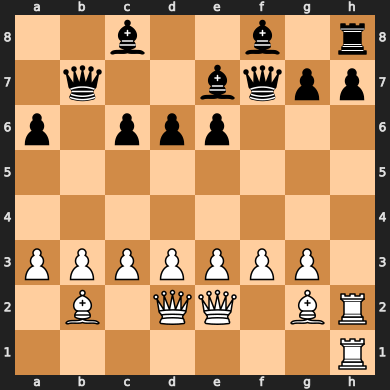

Turn: black
Legal Moves: [('p', 'a7'), ('p', 'b6'), ('p', 'c7'), ('p', 'd7'), ('p', 'f6'), ('p', 'g6'), ('p', 'h6')]


In [70]:
# Human's turn
m = ('P', 'g3')
pos = pos.result(*m)
ICD.display(pos.get_chess_board())
if not pos.game_over():
    move_list = pos.legal_moves()
    print('Turn:', "white" if pos.turn else "black")
    print('Legal Moves:', move_list)
else:
    print('No legal moves available')

MCTS Agent Played: ('p', 'h6')


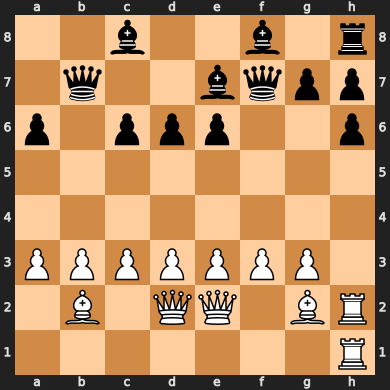

Turn: white
Legal Moves: [('K', 'a1'), ('K', 'a2'), ('K', 'b1'), ('K', 'c1'), ('K', 'c2'), ('K', 'd1'), ('K', 'e1'), ('K', 'f1'), ('K', 'f2'), ('K', 'g1')]


In [71]:
# Agent's turn
if not pos.turn:
    m = mcts_strat(pos)
    print("MCTS Agent Played:", m)
    pos = pos.result(*m)
    ICD.display(pos.get_chess_board())
if not pos.game_over():
    move_list = pos.legal_moves()
    print('Turn:', "white" if pos.turn else "black")
    print('Legal Moves:', move_list)
else:
    print('No legal moves available')

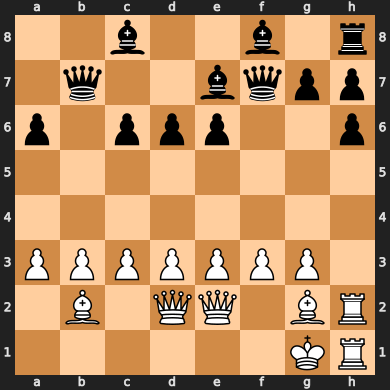

Turn: black
Legal Moves: [('p', 'a7'), ('p', 'b6'), ('p', 'c7'), ('p', 'd7'), ('p', 'f6'), ('p', 'g6')]


In [72]:
# Human's turn
m = ('K', 'g1')
pos = pos.result(*m)
ICD.display(pos.get_chess_board())
if not pos.game_over():
    move_list = pos.legal_moves()
    print('Turn:', "white" if pos.turn else "black")
    print('Legal Moves:', move_list)
else:
    print('No legal moves available')

MCTS Agent Played: ('p', 'c7')


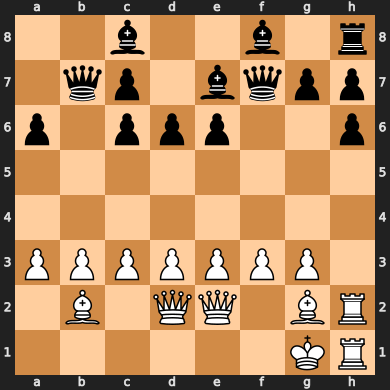

Turn: black
Legal Moves: [('k', 'a8'), ('k', 'a7'), ('k', 'b8'), ('k', 'd8'), ('k', 'd7'), ('k', 'e8'), ('k', 'g8')]


In [73]:
# Agent's turn
if not pos.turn:
    m = mcts_strat(pos)
    print("MCTS Agent Played:", m)
    pos = pos.result(*m)
    ICD.display(pos.get_chess_board())
if not pos.game_over():
    move_list = pos.legal_moves()
    print('Turn:', "white" if pos.turn else "black")
    print('Legal Moves:', move_list)
else:
    print('No legal moves available')

MCTS Agent Played: ('k', 'b8')


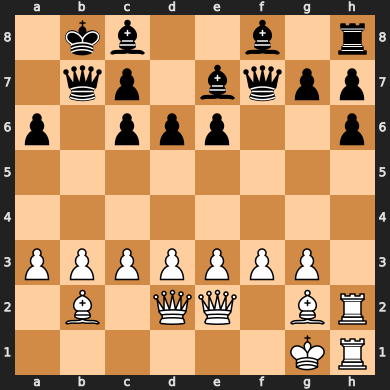

No legal moves available


In [74]:
# Agent's turn
if not pos.turn:
    m = mcts_strat(pos)
    print("MCTS Agent Played:", m)
    pos = pos.result(*m)
    ICD.display(pos.get_chess_board())
if not pos.game_over():
    move_list = pos.legal_moves()
    print('Turn:', "white" if pos.turn else "black")
    print('Legal Moves:', move_list)
else:
    print('No legal moves available')

### Stockfish simulation
Once all the pieces are placed, stockfish simulates the game

white played 1.c4


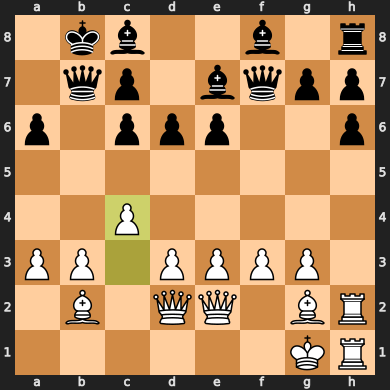

black played 1...e5


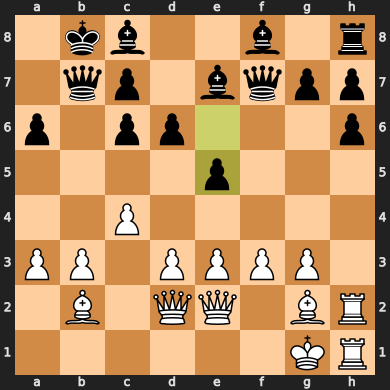

white played 2.Qb4


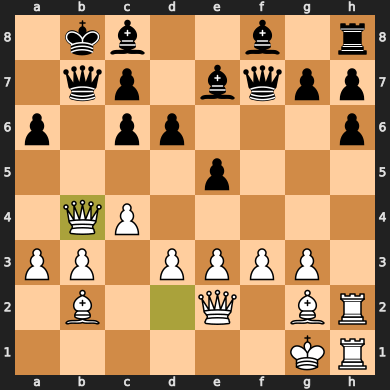

black played 2...Qg6


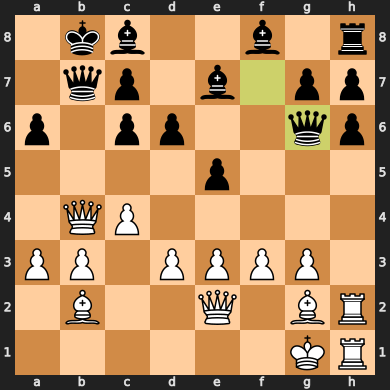

white played 3.Qxb7+


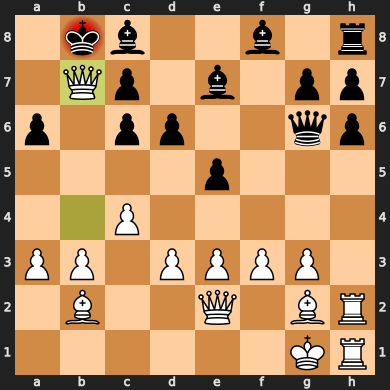

black played 3...Bxb7


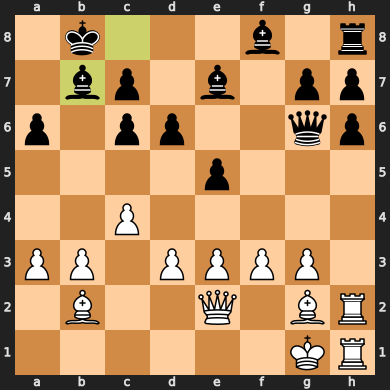

white played 4.Kf2


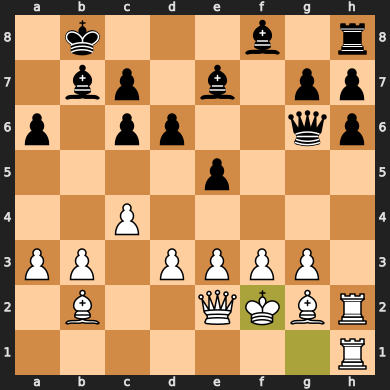

black played 4...Bf6


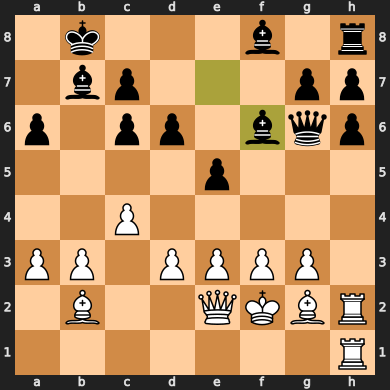

white played 5.f4


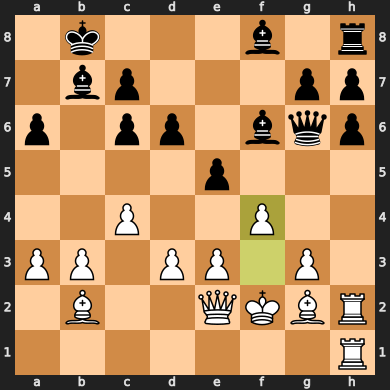

black played 5...exf4


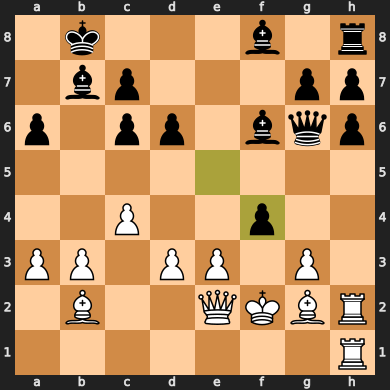

white played 6.gxf4


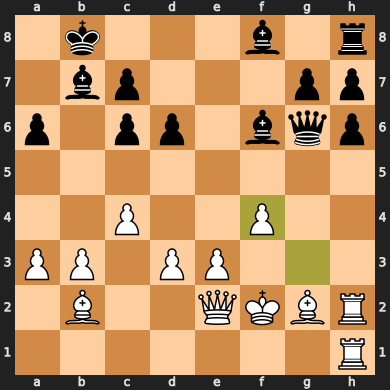

black played 6...d5


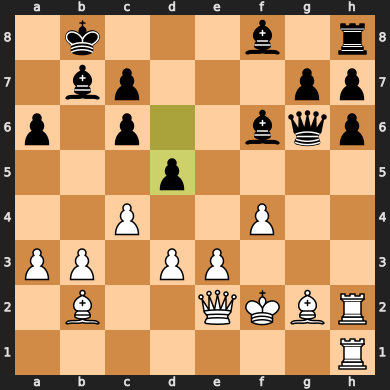

white played 7.Bf3


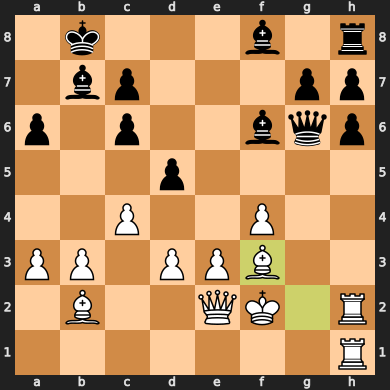

black played 7...Bxb2


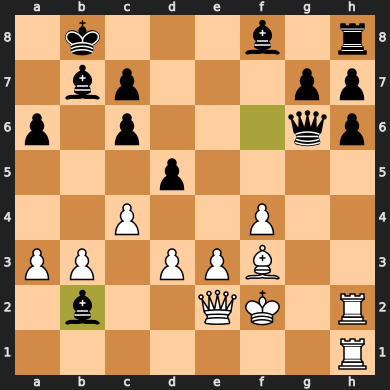

white played 8.Qxb2


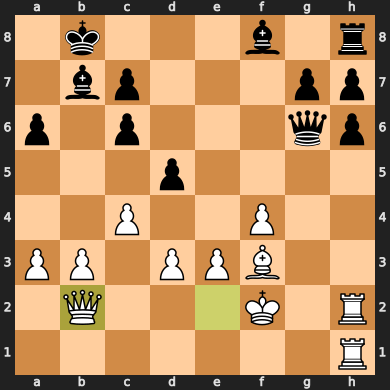

black played 8...Ka8


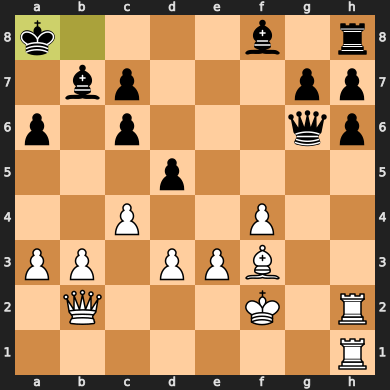

white played 9.Ke2


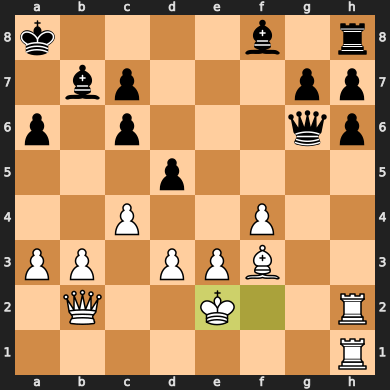

black played 9...Qf7


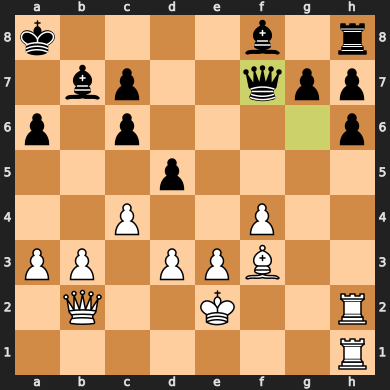

white played 10.Rg2


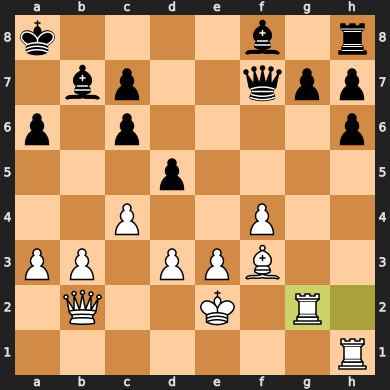

black played 10...Kb8


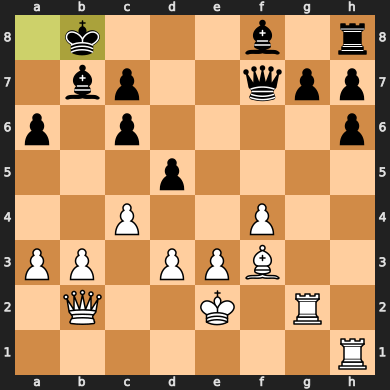

white played 11.Rxh6


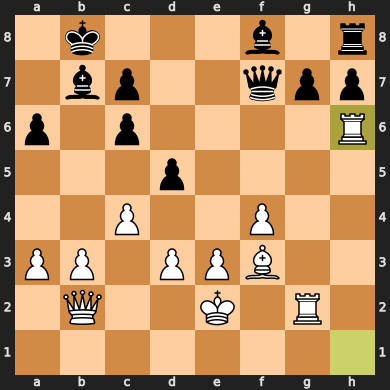

black played 11...d4


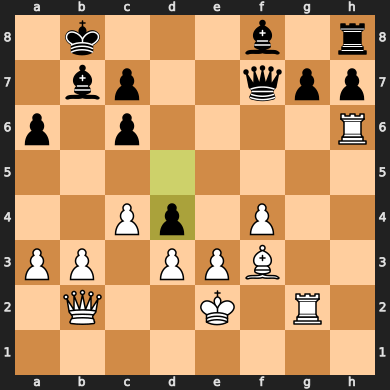

white played 12.Qxd4


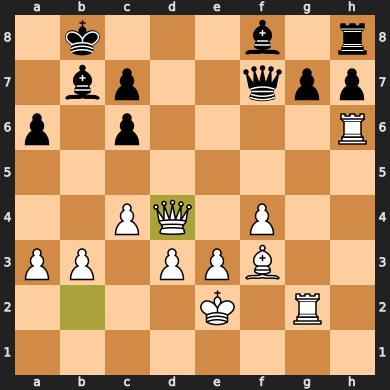

black played 12...Bc8


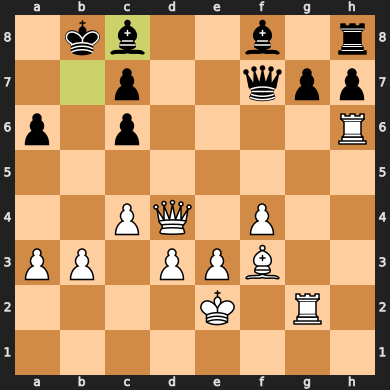

white played 13.Bxc6


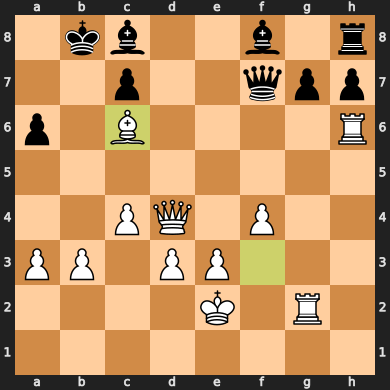

black played 13...gxh6


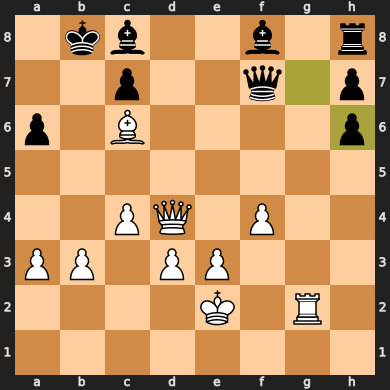

white played 14.Qxh8


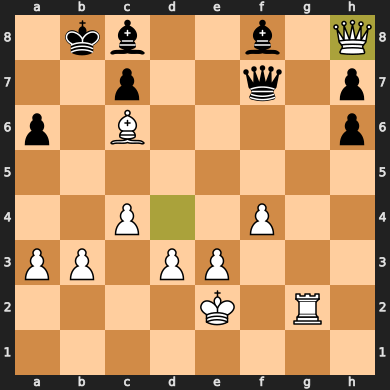

black played 14...Bxa3


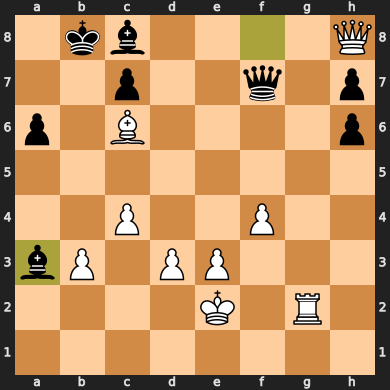

white played 15.Qg7


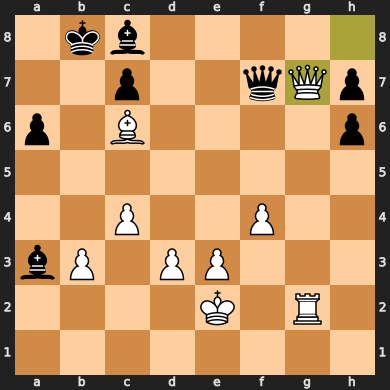

black played 15...Qe6


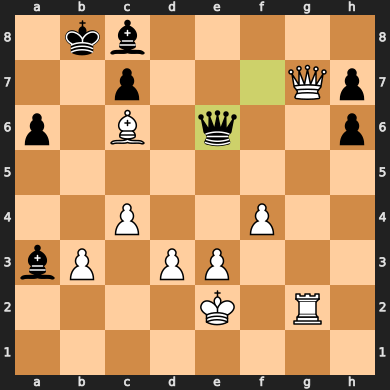

white played 16.Bf3


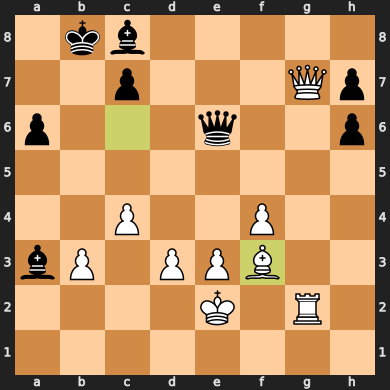

black played 16...Qb6


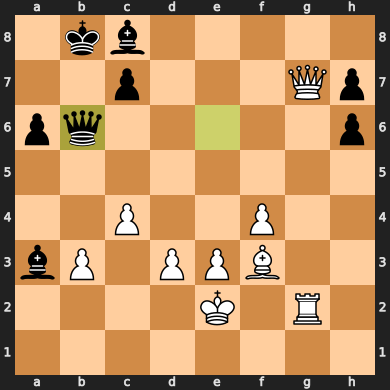

white played 17.b4


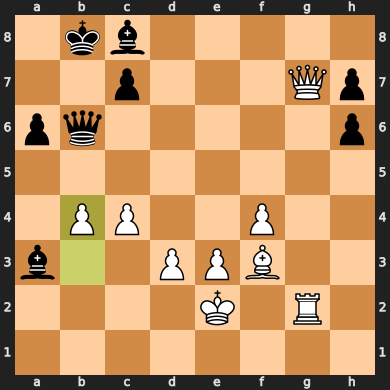

black played 17...Bc1


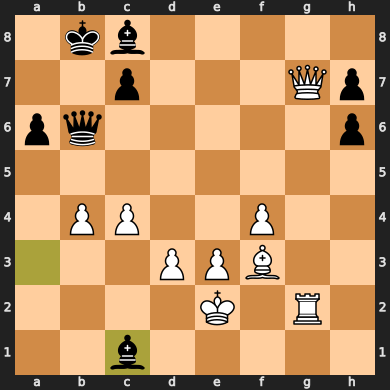

white played 18.Qe7


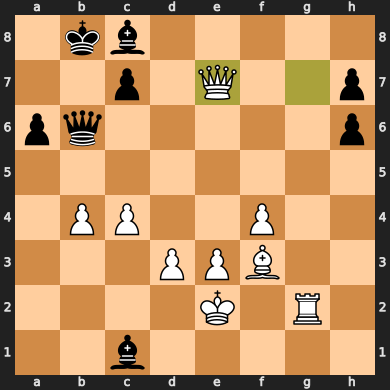

black played 18...Bb2


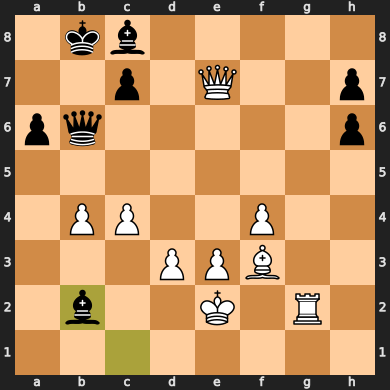

white played 19.Rg8


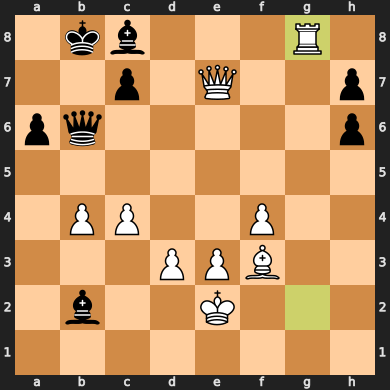

black played 19...Qd6


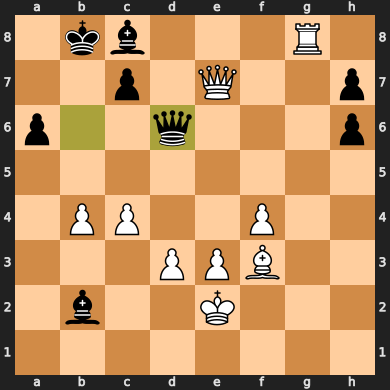

white played 20.Qe4


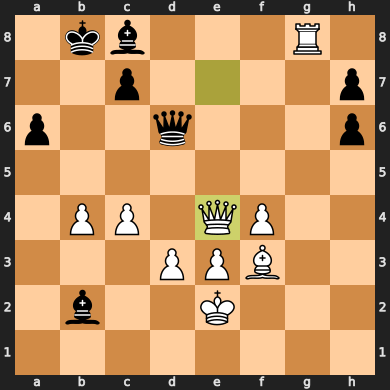

black played 20...c6


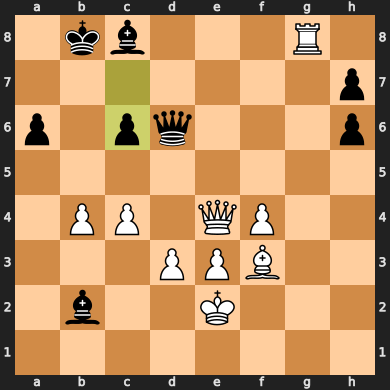

white played 21.c5


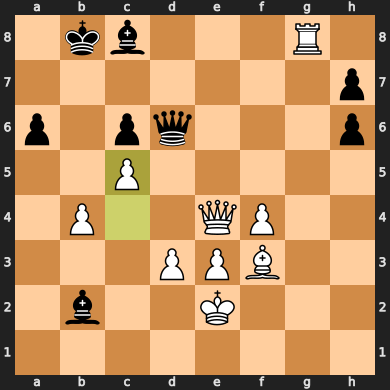

black played 21...Qg6


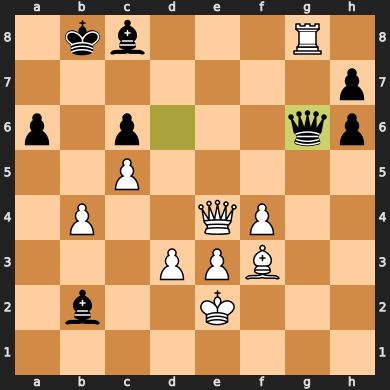

white played 22.Rxg6


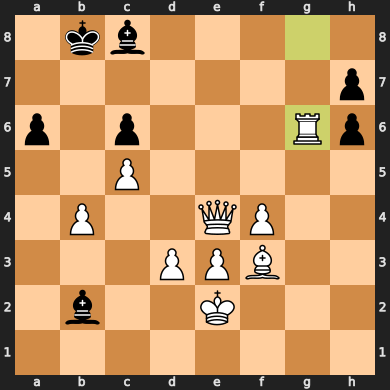

black played 22...Bb7


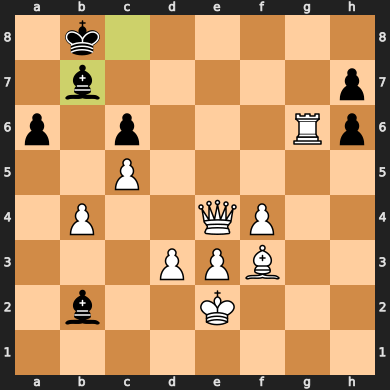

white played 23.Rxh6


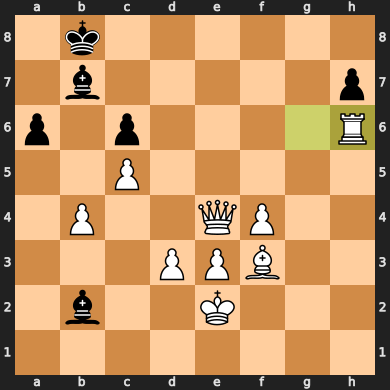

black played 23...Bd4


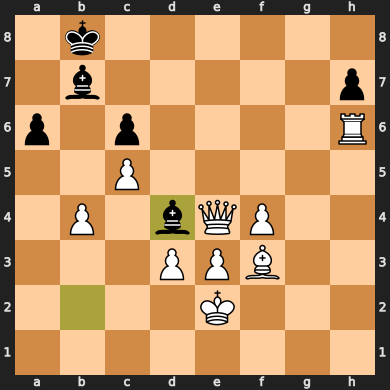

white played 24.Qxd4


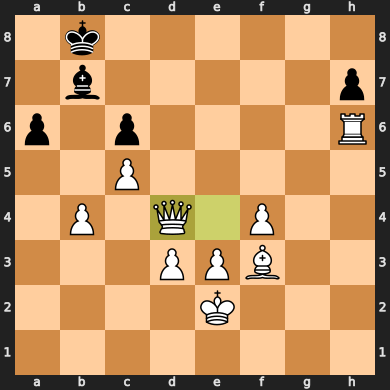

black played 24...a5


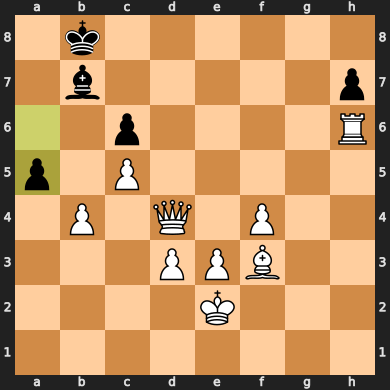

white played 25.Qd8+


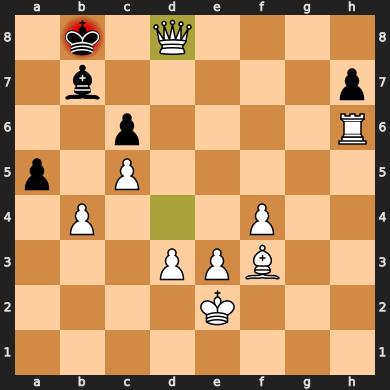

black played 25...Ka7


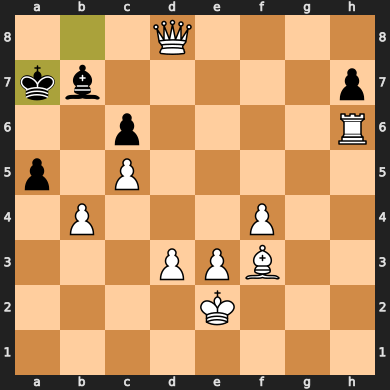

white played 26.Rxh7


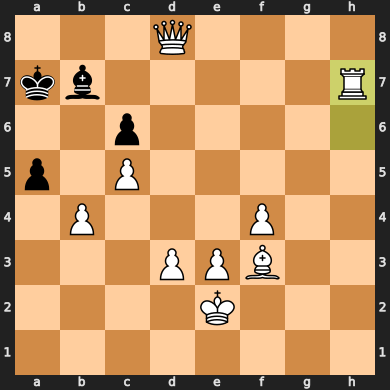

black played 26...a4


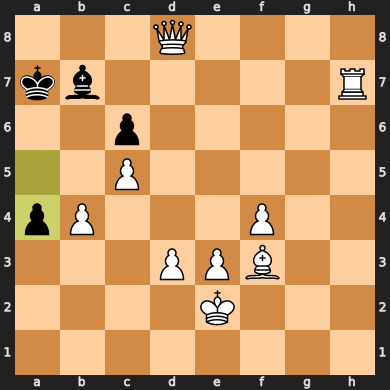

white played 27.Qb6+


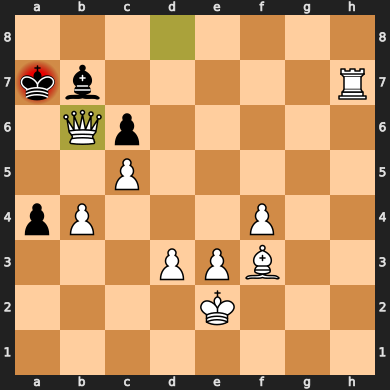

black played 27...Kb8


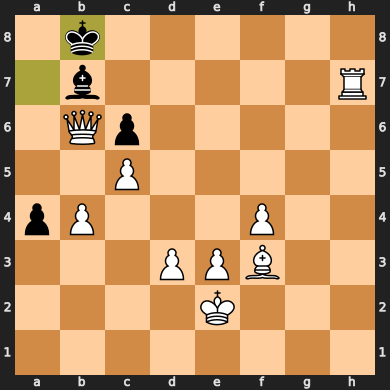

white played 28.Qxb7#


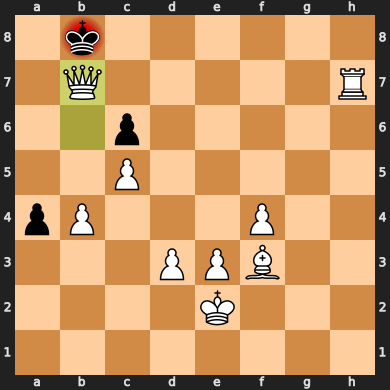

. k . . . . . .
. Q . . . . . R
. . p . . . . .
. . P . . . . .
p P . . . P . .
. . . P P B . .
. . . . K . . .
. . . . . . . .
Final position FEN:  1k6/1Q5R/2p5/2P5/pP3P2/3PPB2/4K3/8 b - - 0 28
-----


In [75]:
dictsidetomove = {True:'white',False:'black'}
notationdict = {True:'.', False:'...'}
board = pos.get_chess_board()
while not board.is_game_over():
    result = engine.play(board,chess.engine.Limit(time=constants.PONDER_TIME))
    print(dictsidetomove[board.turn]+' played '+str(board.fullmove_number)+notationdict[board.turn]+str(board.san(result.move)))
    board.push(result.move)
    ICD.display(board)
print(board)
print('Final position FEN: ',board.fen())
print('-----')

In [ ]:
engine.quit()